<a href="https://colab.research.google.com/github/Rafael-Muthemba/Phase-2-Independent-Project/blob/main/Phase2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The business problem the client is facing is how to create a successful platform for buying and selling houses in King County. To achieve this goal, the platform needs to provide accurate estimates of house prices, which is crucial for both buyers and sellers.

To accomplish this, the client wants to use a model that can infer the most important features that determine house prices in King County. These features might include factors such as the location of the house, the number of bedrooms and bathrooms, the size of the house, and other relevant factors.

The model needs to be trained on data that accurately represents the real estate market in King County, including historical sales data, current property listings, and other relevant data sources. By using this data, the model can learn to accurately estimate the value of a house based on its features.

Once the model is trained, it can be integrated into the platform to provide buyers and sellers with accurate estimates of house prices, which can help them make informed decisions about buying or selling a property. By providing a reliable and accurate platform for buying and selling houses in King County, the client can establish themselves as a leader in the local real estate market and attract a large and loyal customer base.

### Project Objectives
* To identify the key features that significantly influence house prices in King County.
* To develop a model that accurately estimates house prices based on the identified features.
* To evaluate the performance of the developed model in estimating house prices in King County.

# Data Understanding

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Our DataFrame
df = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")

# Viewing the First Five Rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Checking shape of the data

df.shape

(21597, 21)

In [ ]:
# Understanding the general info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
# Getting the statistical details of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Checking for NaN Values as a % of the whole Data Set

(df.isnull().sum())/len(df)*100


id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

We can see that 'waterfront' and 'yr_renovated' columns have the highest percentage of null values

# Data Preparation

We want to focus on some of the success metrics and this will guide our basis of selecting our data from the King county housing sales.

Key pointers for the success metrics:

* Sales in the county

* Year to year variance on average sold price

* Year to year variance on sold average dollar per square foot

* Number of Days a property is on the market

Furthermore, we will create regression models that will establish whether there is any causal effect between various variables included in the data set. These models can also help in predictive analysis that would help in budget and forecasting.

**Continuous Data:**
* Price of the houses
* Square footage of the lot
* Square footage of the living space of the home
* Number of Bedrooms per house
* Number of Bathrooms per house

**Categorical Data:**
* Date
* Condition
* Year Built
* Waterfront
* View

In [ ]:
# Creating a new data frame for the data to be used in the analysis

new_data = df.loc[:, ["date", "price", "sqft_lot", "sqft_living", "sqft_above", "bedrooms", "bathrooms", "condition", "yr_built", "waterfront", "view","Grade"]]
new_data

,date,price,sqft_lot,sqft_living,sqft_above,bedrooms,bathrooms,condition,yr_built,waterfront,view
0,10/13/2014,221900.0,5650,1180,1180,3,1.00,Average,1955,NaN,NONE
1,12/9/2014,538000.0,7242,2570,2170,3,2.25,Average,1951,NO,NONE
2,2/25/2015,180000.0,10000,770,770,2,1.00,Average,1933,NO,NONE
3,12/9/2014,604000.0,5000,1960,1050,4,3.00,Very Good,1965,NO,NONE
4,2/18/2015,510000.0,8080,1680,1680,3,2.00,Average,1987,NO,NONE
...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1131,1530,1530,3,2.50,Average,2009,NO,NONE
21593,2/23/2015,400000.0,5813,2310,2310,4,2.50,Average,2014,NO,NONE
21594,6/23/2014,402101.0,1350,1020,1020,2,0.75,Average,2009,NO,NONE
21595,1/16/2015,400000.0,2388,1600,1600,3,2.50,Average,2004,NaN,NONE


## Data Cleaning

In [ ]:
# Checking for duplicate values
new_data.duplicated().sum()

0

In [ ]:
df[new_data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
# Checking for null values in the selected data set
new_data.isnull().sum()

date              0
price             0
sqft_lot          0
sqft_living       0
sqft_above        0
bedrooms          0
bathrooms         0
condition         0
yr_built          0
waterfront     2376
view             63
dtype: int64

In [ ]:
# Replacing the null values in the selected data set using mode

new_data = new_data.fillna(new_data.mode().iloc[0])

new_data.isnull().sum()

date           0
price          0
sqft_lot       0
sqft_living    0
sqft_above     0
bedrooms       0
bathrooms      0
condition      0
yr_built       0
waterfront     0
view           0
dtype: int64



*   Now we have no null values.


In [ ]:
# Rounding off the bathroom values to whole numbers

new_data = new_data.round()
new_data

,date,price,sqft_lot,sqft_living,sqft_above,bedrooms,bathrooms,condition,yr_built,waterfront,view
0,10/13/2014,221900.0,5650,1180,1180,3,1.0,Average,1955,NO,NONE
1,12/9/2014,538000.0,7242,2570,2170,3,2.0,Average,1951,NO,NONE
2,2/25/2015,180000.0,10000,770,770,2,1.0,Average,1933,NO,NONE
3,12/9/2014,604000.0,5000,1960,1050,4,3.0,Very Good,1965,NO,NONE
4,2/18/2015,510000.0,8080,1680,1680,3,2.0,Average,1987,NO,NONE
...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1131,1530,1530,3,2.0,Average,2009,NO,NONE
21593,2/23/2015,400000.0,5813,2310,2310,4,2.0,Average,2014,NO,NONE
21594,6/23/2014,402101.0,1350,1020,1020,2,1.0,Average,2009,NO,NONE
21595,1/16/2015,400000.0,2388,1600,1600,3,2.0,Average,2004,NO,NONE


#### Identifying Outliers


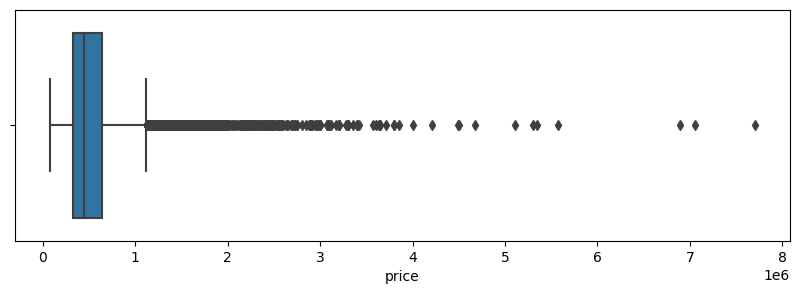

In [ ]:
# identify the price outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'price', data = new_data)

# Display the plot
plt.show()

In [ ]:
# Remove price outliers

new_price= (new_data['price'])[(np.abs(stats.zscore(new_data['price'])) < 3)]

new_price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21191, dtype: float64

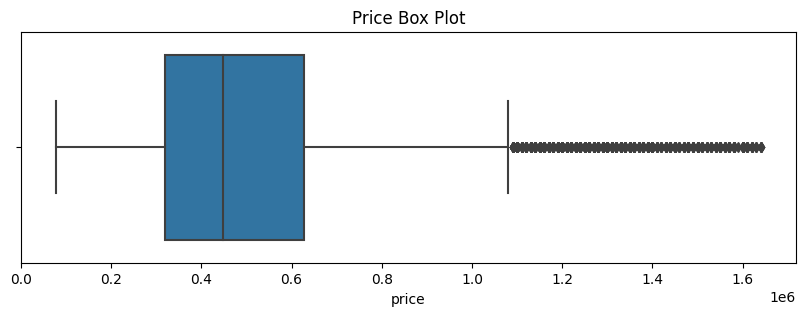

In [ ]:
# Review the new price data
plt.figure(figsize=(10,3))

sns.boxplot(x = new_price)

plt.title('Price Box Plot')


# Display the plot
plt.show()

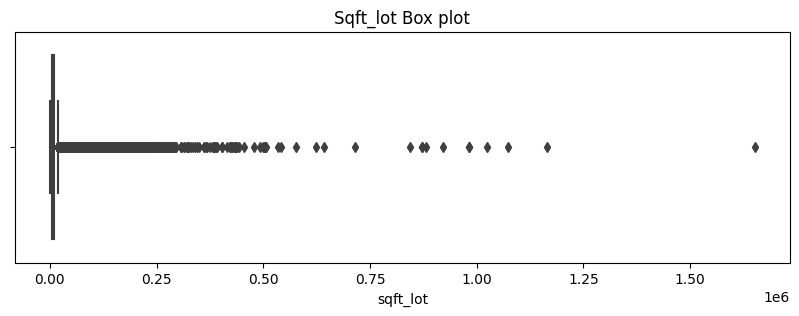

In [ ]:
# identify the sqft_lot outliers
plt.figure(figsize=(10,3))
sns.boxplot(x = 'sqft_lot', data = new_data)

plt.title('Sqft_lot Box plot')
# Display the plot
plt.show()

In [ ]:
# Remove sqft_lot outliers

sqft_lot = new_data['sqft_lot']

new_sqft_lot = sqft_lot[(np.abs(stats.zscore(sqft_lot)) < 5)]

new_sqft_lot

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 21449, dtype: int64

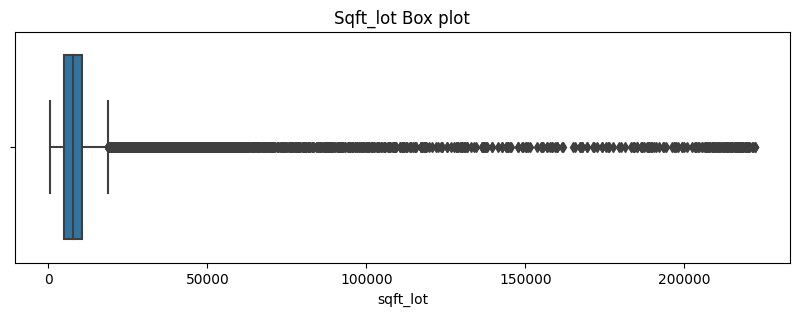

In [ ]:
# Review the new sqft_lot data
plt.figure(figsize=(10,3))
sns.boxplot(x = new_sqft_lot)

plt.title('Sqft_lot Box plot')
# Display the plot
plt.show()

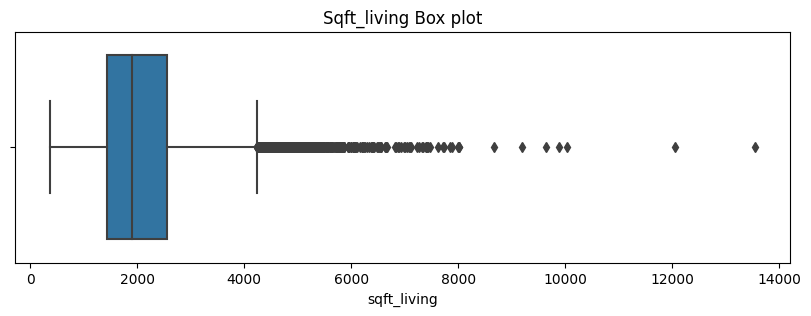

In [ ]:
# identify the sqft_living outliers
plt.figure(figsize=(10,3))
sns.boxplot(x = 'sqft_living', data = new_data)

plt.title('Sqft_living Box plot')
# Display the plot
plt.show()

In [ ]:
# Remove sqft_living outliers

sqft_living = new_data['sqft_living']

new_sqft_living = sqft_living[(np.abs(stats.zscore(sqft_living)) < 5)]

new_sqft_living

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21562, dtype: int64

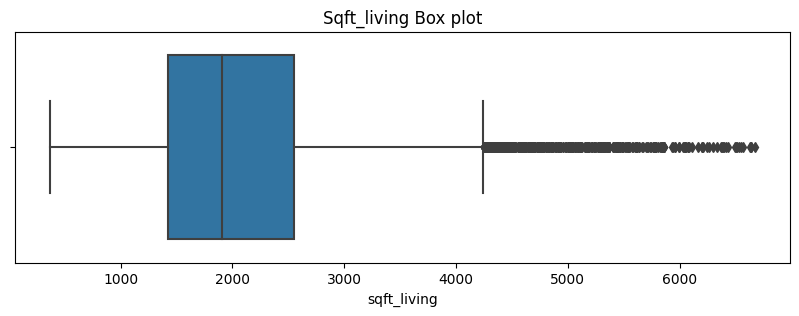

In [ ]:
# Review the new sqft_living data
plt.figure(figsize=(10,3))
sns.boxplot(x = new_sqft_living)

plt.title('Sqft_living Box plot')
# Display the plot
plt.show()

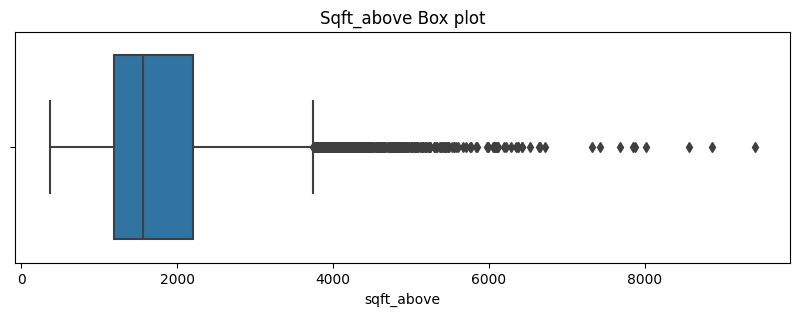

In [ ]:
# identify the sqft_above outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'sqft_above', data = new_data)

plt.title('Sqft_above Box plot')

# Display the plot
plt.show()

In [ ]:
# Removing the sqft_above outliers

sqft_above = new_data['sqft_above']

new_sqft_above = sqft_above[(np.abs(stats.zscore(sqft_above)) < 5)]

new_sqft_above

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_above, Length: 21565, dtype: int64

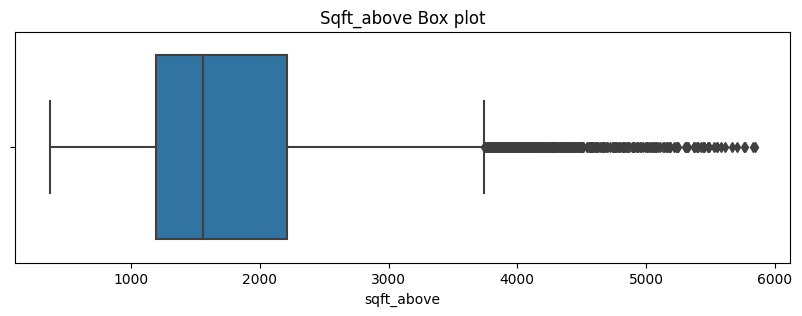

In [ ]:
# Reviewing the sqft_above

plt.figure(figsize=(10,3))

sns.boxplot(x = new_sqft_above)

plt.title('Sqft_above Box plot')
# Display the plot
plt.show()

Text(0.5, 1.0, 'Bedrooms Box plot')

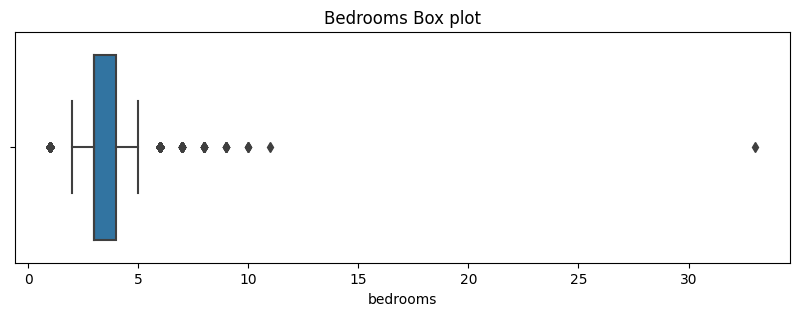

In [ ]:
# identify the bedrooms outliers

plt.figure(figsize=(10,3))

sns.boxplot(x = 'bedrooms', data= new_data)

plt.title('Bedrooms Box plot')

In [ ]:
# Remove bedrooms outliers

bedrooms = new_data['bedrooms']

new_bedrooms = bedrooms[(np.abs(stats.zscore(bedrooms)) < 3)]

new_bedrooms

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 21535, dtype: int64

Text(0.5, 1.0, 'Bedrooms Box plot')

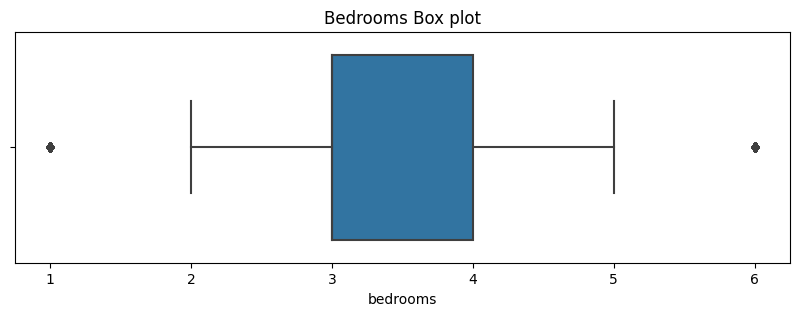

In [ ]:
# Reviewing the bedrooms

plt.figure(figsize=(10,3))

sns.boxplot(x = new_bedrooms)

plt.title('Bedrooms Box plot')

Text(0.5, 1.0, 'Bathrooms Box plot')

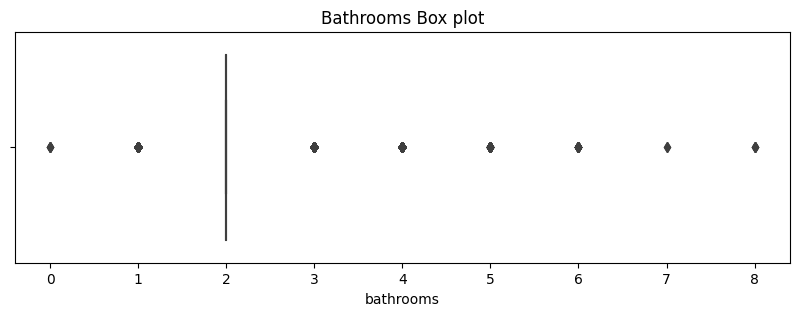

In [ ]:
# identify the bathrooms outliers

plt.figure(figsize=(10,3))

sns.boxplot(x = 'bathrooms', data= new_data)

plt.title('Bathrooms Box plot')

In [ ]:
# Removing the bathrooms outliers

bathrooms = new_data['bathrooms']

new_bathrooms = bathrooms[(np.abs(stats.zscore(bathrooms)) < 5)]

new_bathrooms

0        1.0
1        2.0
2        1.0
3        3.0
4        2.0
        ... 
21592    2.0
21593    2.0
21594    1.0
21595    2.0
21596    1.0
Name: bathrooms, Length: 21567, dtype: float64

Text(0.5, 1.0, 'Bathrooms Box plot')

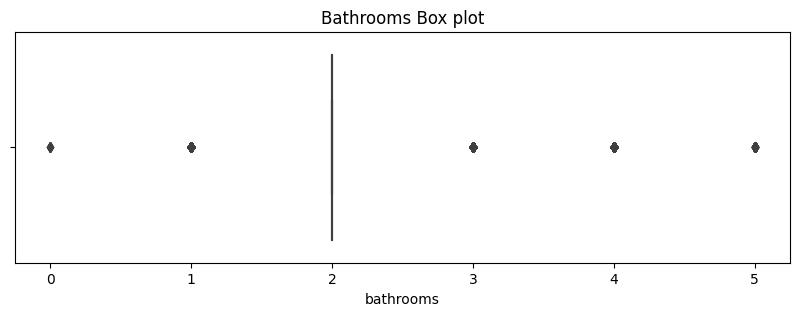

In [ ]:
# Reviewing the bathrooms

plt.figure(figsize=(10,3))

sns.boxplot(x = new_bathrooms)

plt.title('Bathrooms Box plot')

#### Separating Date to Months and Years

In [ ]:
# Separate the date into months and year

new_data['date']=pd.to_datetime(new_data['date'])
new_data['year']=new_data['date'].apply(lambda x: x.year)
new_data['month']=new_data['date'].apply(lambda x: x.month)
new_data

,date,price,sqft_lot,sqft_living,sqft_above,bedrooms,bathrooms,condition,yr_built,waterfront,view,year,month
0,2014-10-13,221900.0,5650,1180,1180,3,1.0,Average,1955,NO,NONE,2014,10
1,2014-12-09,538000.0,7242,2570,2170,3,2.0,Average,1951,NO,NONE,2014,12
2,2015-02-25,180000.0,10000,770,770,2,1.0,Average,1933,NO,NONE,2015,2
3,2014-12-09,604000.0,5000,1960,1050,4,3.0,Very Good,1965,NO,NONE,2014,12
4,2015-02-18,510000.0,8080,1680,1680,3,2.0,Average,1987,NO,NONE,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,1131,1530,1530,3,2.0,Average,2009,NO,NONE,2014,5
21593,2015-02-23,400000.0,5813,2310,2310,4,2.0,Average,2014,NO,NONE,2015,2
21594,2014-06-23,402101.0,1350,1020,1020,2,1.0,Average,2009,NO,NONE,2014,6
21595,2015-01-16,400000.0,2388,1600,1600,3,2.0,Average,2004,NO,NONE,2015,1


#### Intergrating the Data

In [ ]:
kc_data = pd.concat([new_price, new_sqft_lot, new_sqft_living, new_sqft_above, new_bathrooms, new_bedrooms, (new_data.loc[:, ["condition", "waterfront", "yr_built", "view", "year", "month"]])], axis=1, join='inner')
kc_data


,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,condition,waterfront,yr_built,view,year,month
0,221900.0,5650,1180,1180,1.0,3,Average,NO,1955,NONE,2014,10
1,538000.0,7242,2570,2170,2.0,3,Average,NO,1951,NONE,2014,12
2,180000.0,10000,770,770,1.0,2,Average,NO,1933,NONE,2015,2
3,604000.0,5000,1960,1050,3.0,4,Very Good,NO,1965,NONE,2014,12
4,510000.0,8080,1680,1680,2.0,3,Average,NO,1987,NONE,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,1530,1530,2.0,3,Average,NO,2009,NONE,2014,5
21593,400000.0,5813,2310,2310,2.0,4,Average,NO,2014,NONE,2015,2
21594,402101.0,1350,1020,1020,1.0,2,Average,NO,2009,NONE,2014,6
21595,400000.0,2388,1600,1600,2.0,3,Average,NO,2004,NONE,2015,1


## Exploratory Data Analysis

### Univariate Analysis
This is an analysis where we explore each variable independently.

In [ ]:
# statistical data for our continuous data
kc_data.describe()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,yr_built,year,month
count,2.099000e+04,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000
mean,5.052195e+05,12448.406479,2021.600858,1742.422249,2.023392,3.343116,1970.878418,2014.322630,6.575798
std,2.582753e+05,22240.482923,821.209702,760.118260,0.705387,0.867705,29.287564,0.467494,3.112888
min,7.800000e+04,520.000000,370.000000,370.000000,0.000000,1.000000,1900.000000,2014.000000,1.000000
25%,3.199500e+05,5000.000000,1410.000000,1180.000000,2.000000,3.000000,1951.000000,2014.000000,4.000000
50%,4.450000e+05,7520.000000,1890.000000,1540.000000,2.000000,3.000000,1974.000000,2014.000000,6.000000
75%,6.250000e+05,10370.000000,2493.750000,2150.000000,2.000000,4.000000,1996.000000,2015.000000,9.000000
max,1.640000e+06,222156.000000,6563.000000,5844.000000,5.000000,6.000000,2015.000000,2015.000000,12.000000


Text(0.5, 0.98, 'Distribution before Log transfomation')

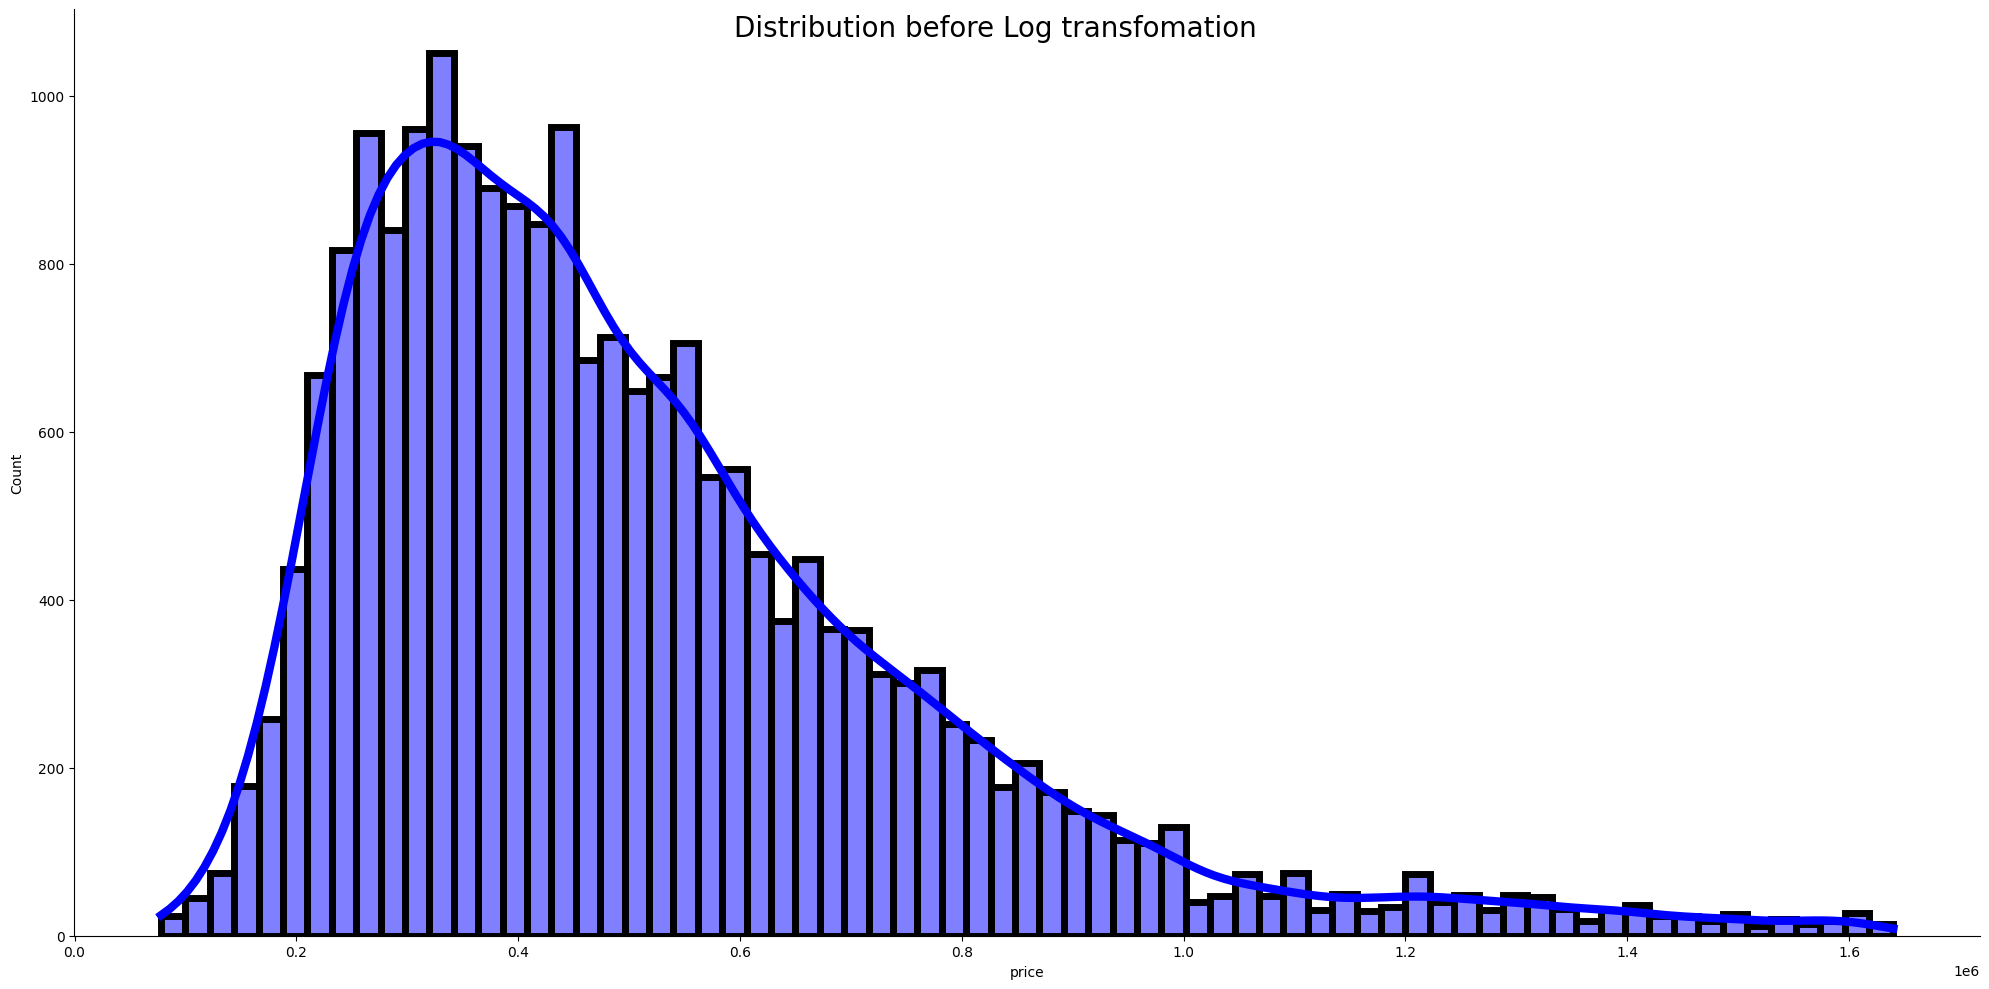

In [ ]:
# price distribution

ax = sns.displot(kc_data['price'], kde = True, line_kws={'color': 'black', 'lw': 6} , color = "blue", height=10, aspect=2,
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

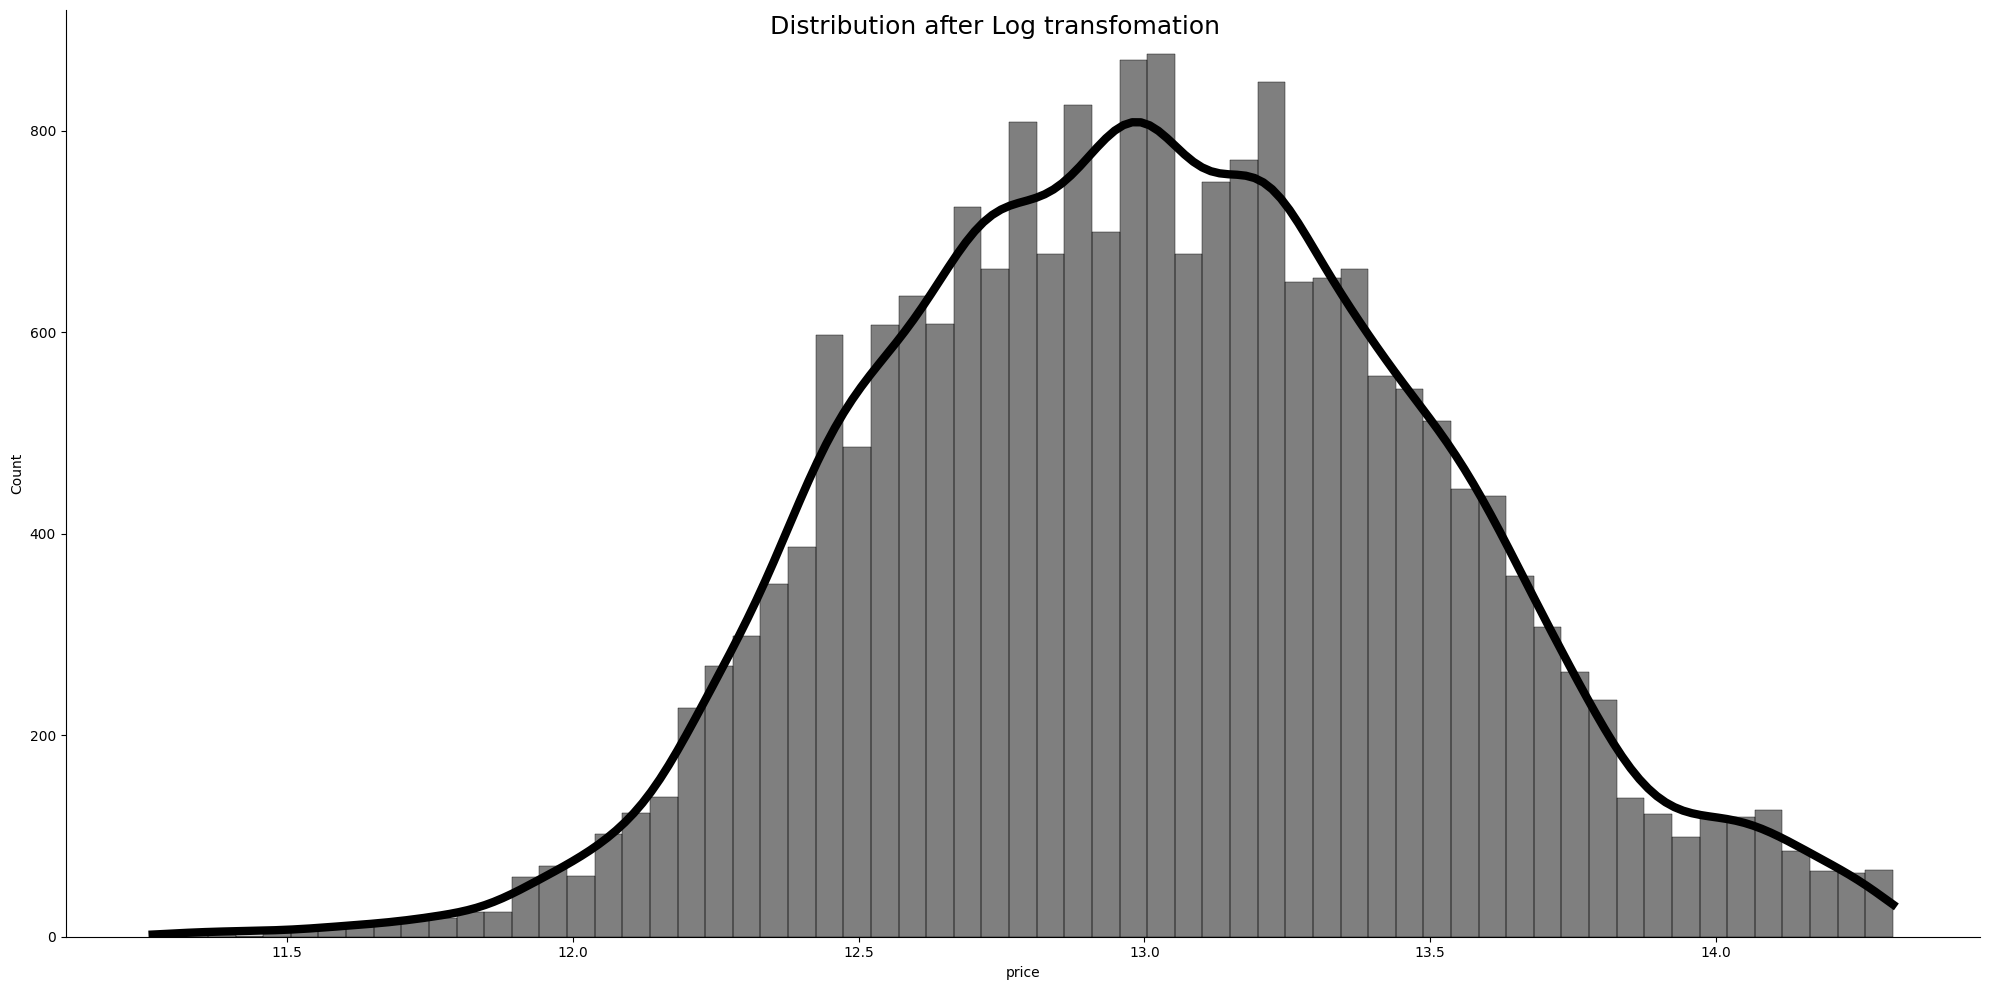

In [ ]:
# Normalize price distribution

p = np.log(kc_data['price'])

ax = sns.displot(p, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2,
            linewidth = 0.3)

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [ ]:
# Maximum price and minimum price

max_price = kc_data['price'].max()

min_price = kc_data['price'].min()

avg_price = kc_data['price'].mean()

max_price, min_price, avg_price

(1640000.0, 78000.0, 505219.53701762744)

Text(0.5, 0.98, 'Distribution before Log transfomation')

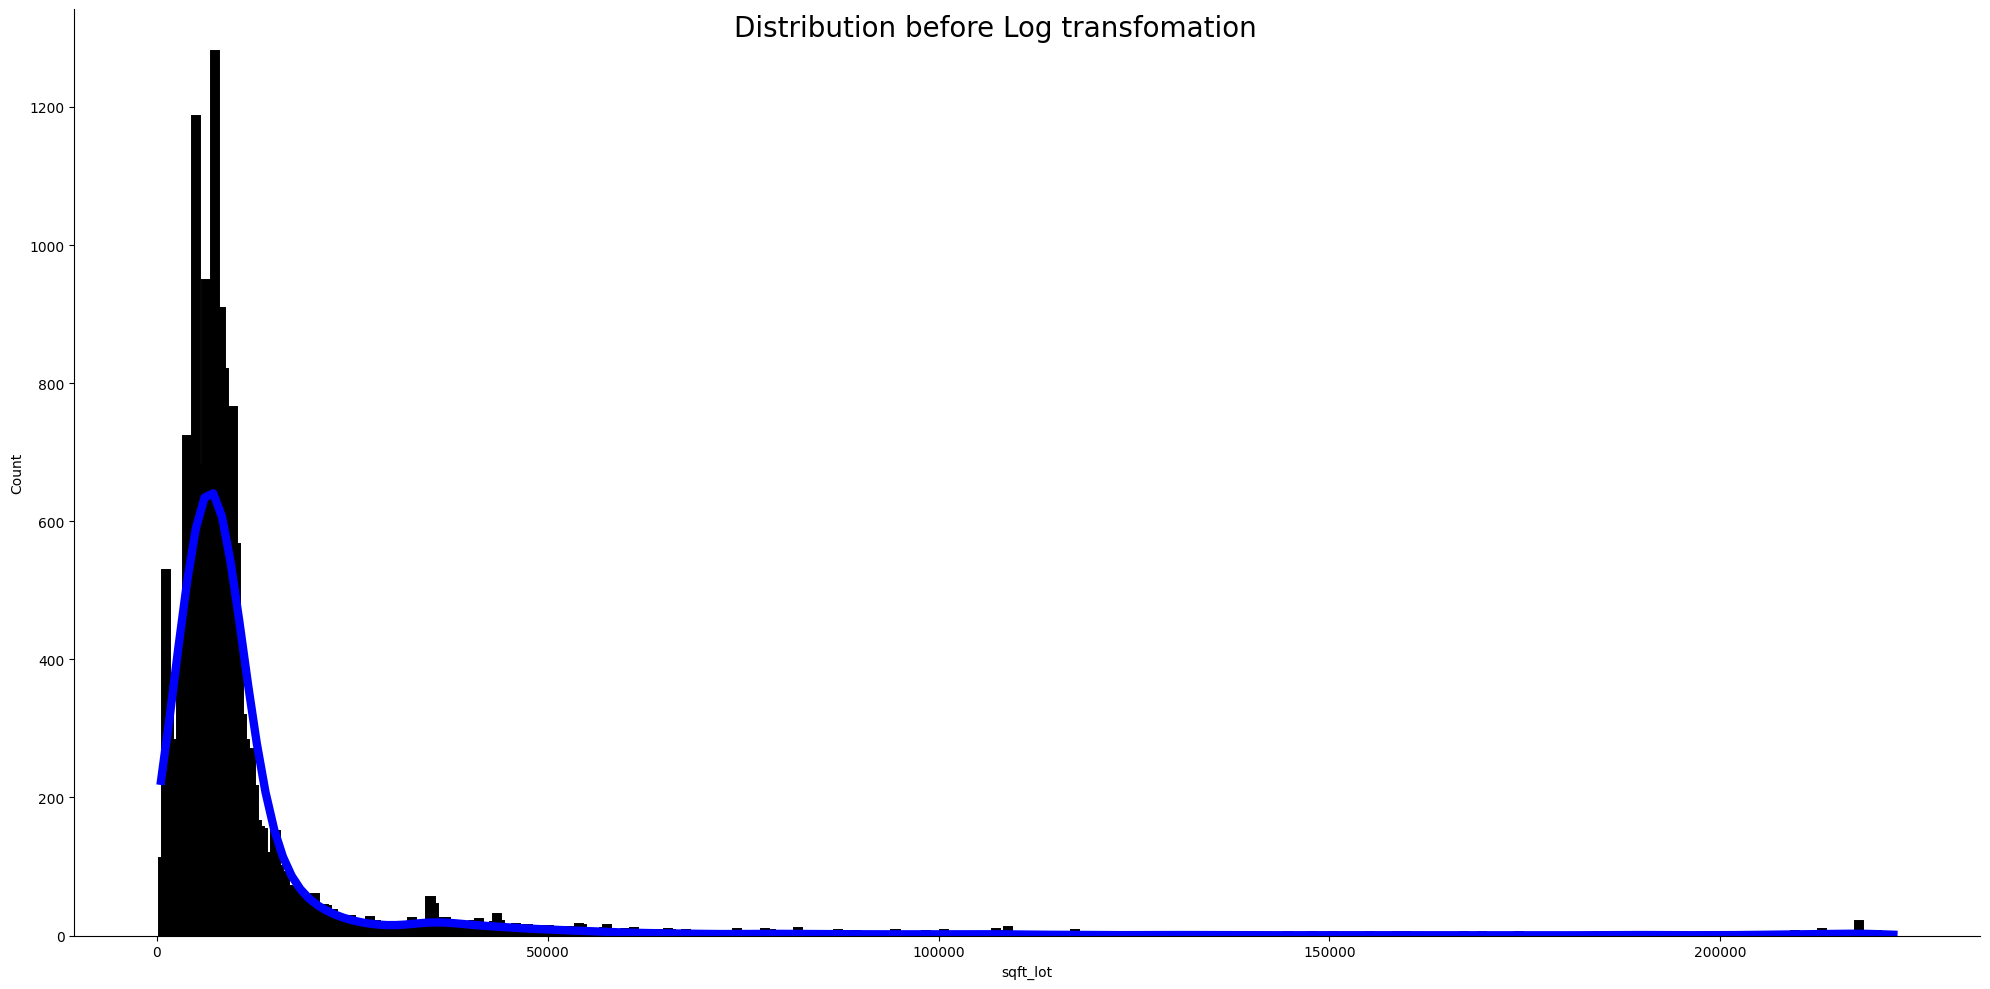

In [ ]:
ax = sns.displot(kc_data['sqft_lot'], kde = True, line_kws={'color': 'blue', 'lw': 6} , color = "blue", height=10, aspect=2,
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

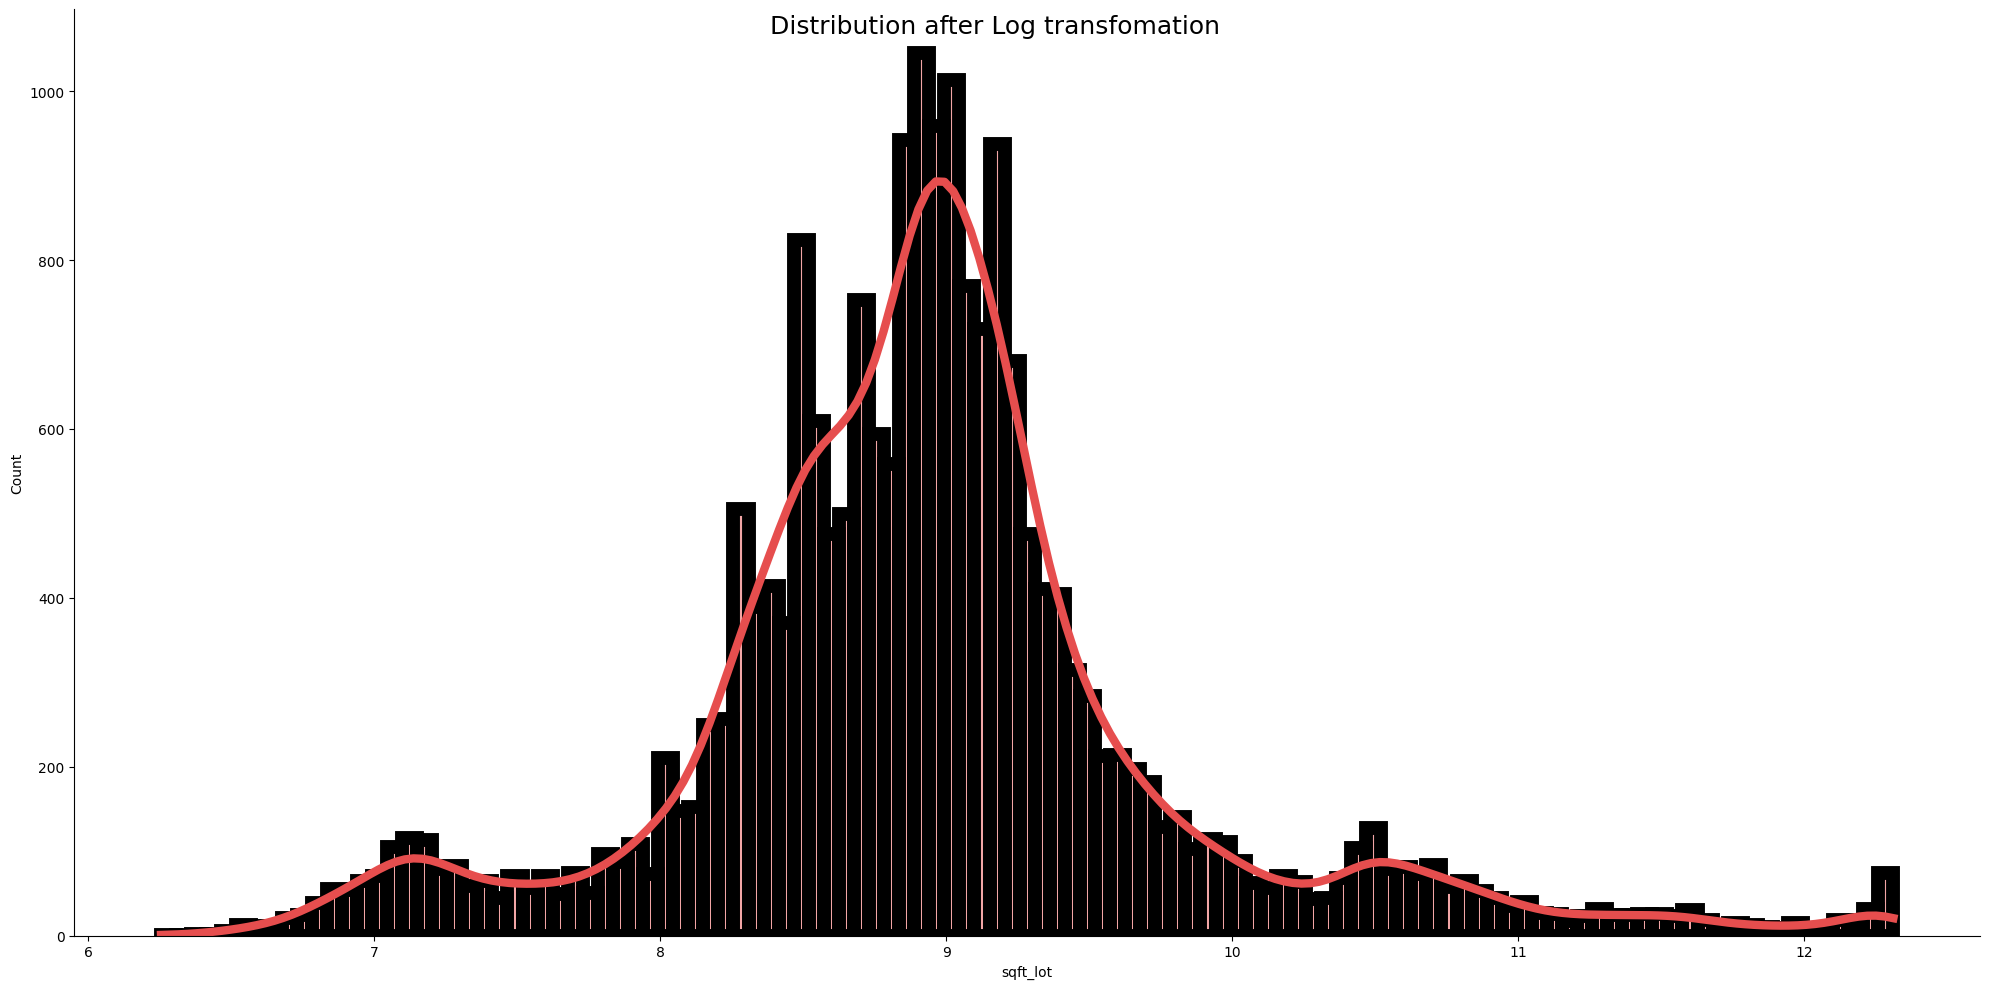

In [ ]:
# Normalize the sqft_lot data

l = np.log(kc_data['sqft_lot'])

ax = sns.displot(l, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "#e64e4e", height=10, aspect=2,
            linewidth = 10 )

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [ ]:
max_lot = kc_data['sqft_lot'].max()

min_lot = kc_data['sqft_lot'].min()

avg_lot = kc_data['sqft_lot'].mean()

max_lot, min_lot, avg_lot

(222156, 520, 12448.406479275845)

In [ ]:
price_per_sqft_lot = kc_data['price'].mean()/kc_data['sqft_lot'].mean()

price_per_sqft_lot

40.58507712282041

Text(0.5, 0.98, 'Distribution before Log transfomation')

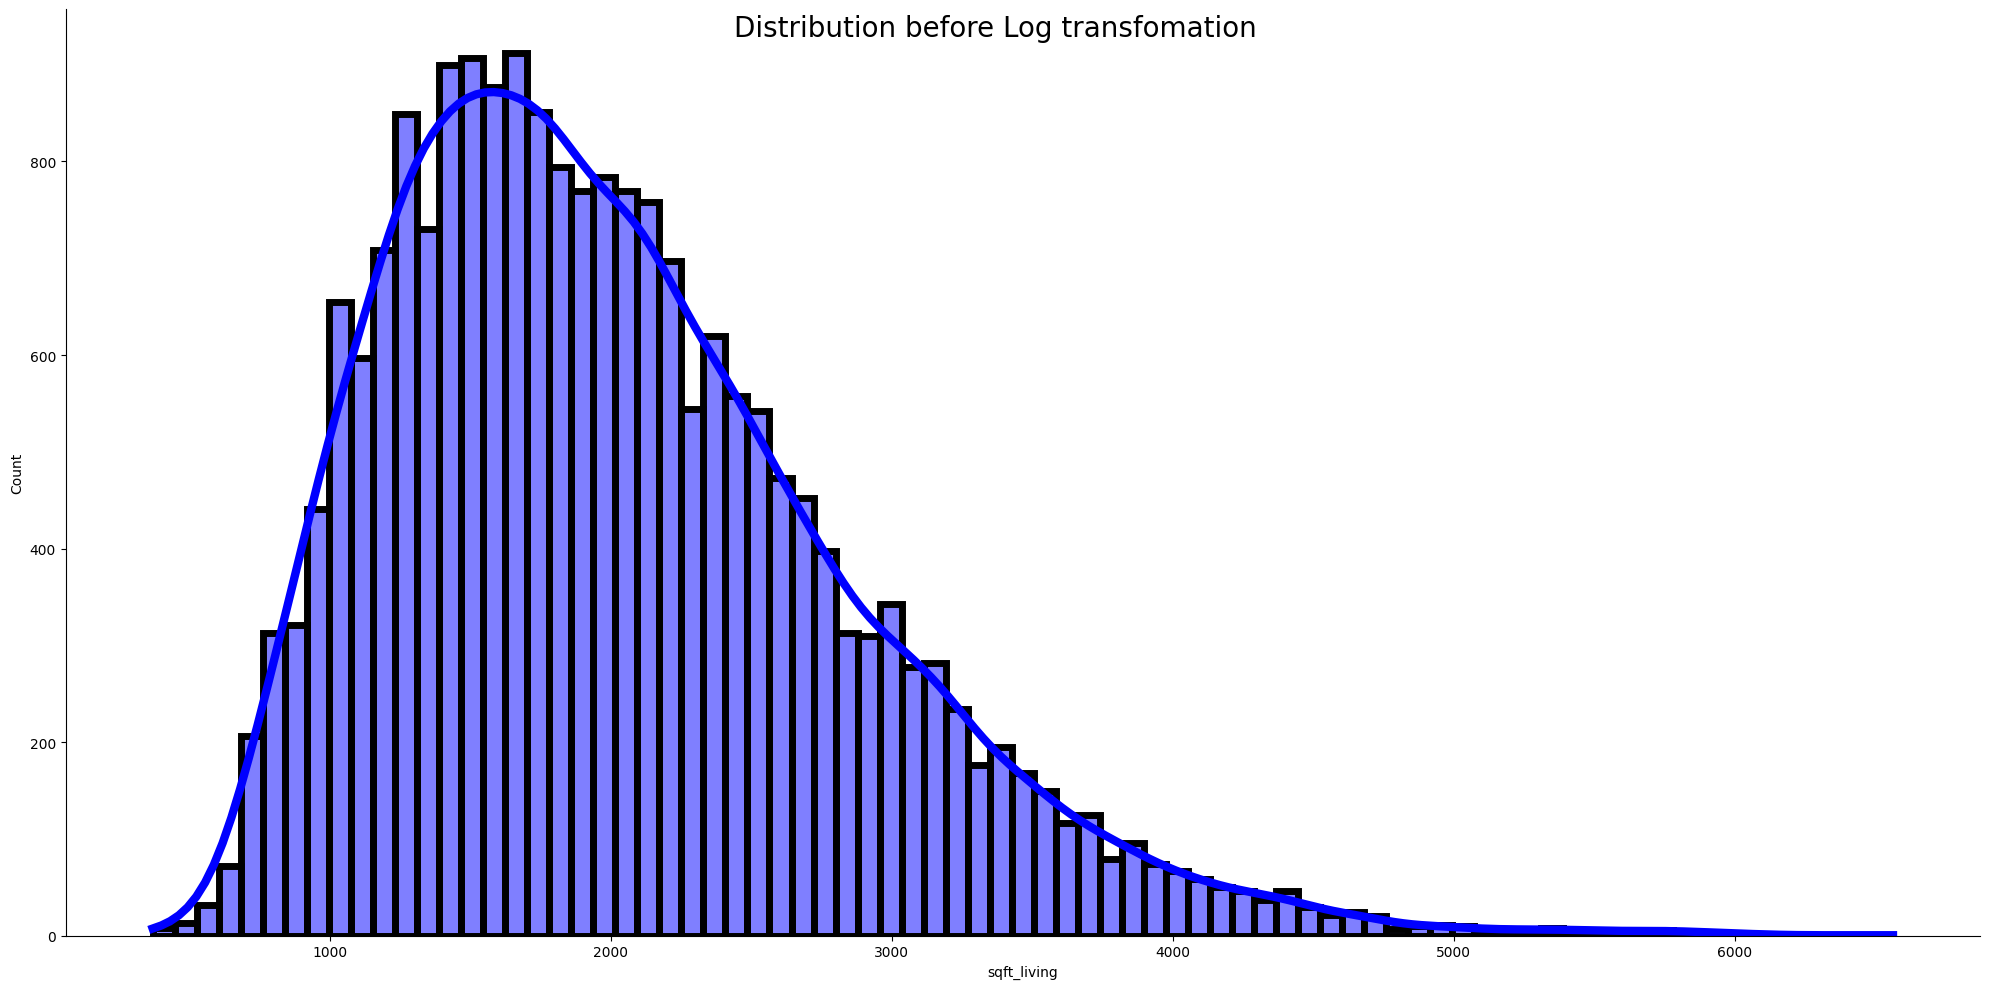

In [ ]:
ax = sns.displot(kc_data['sqft_living'], kde = True, line_kws={'color': 'blue', 'lw': 6} , color = "blue", height=10, aspect=2,
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

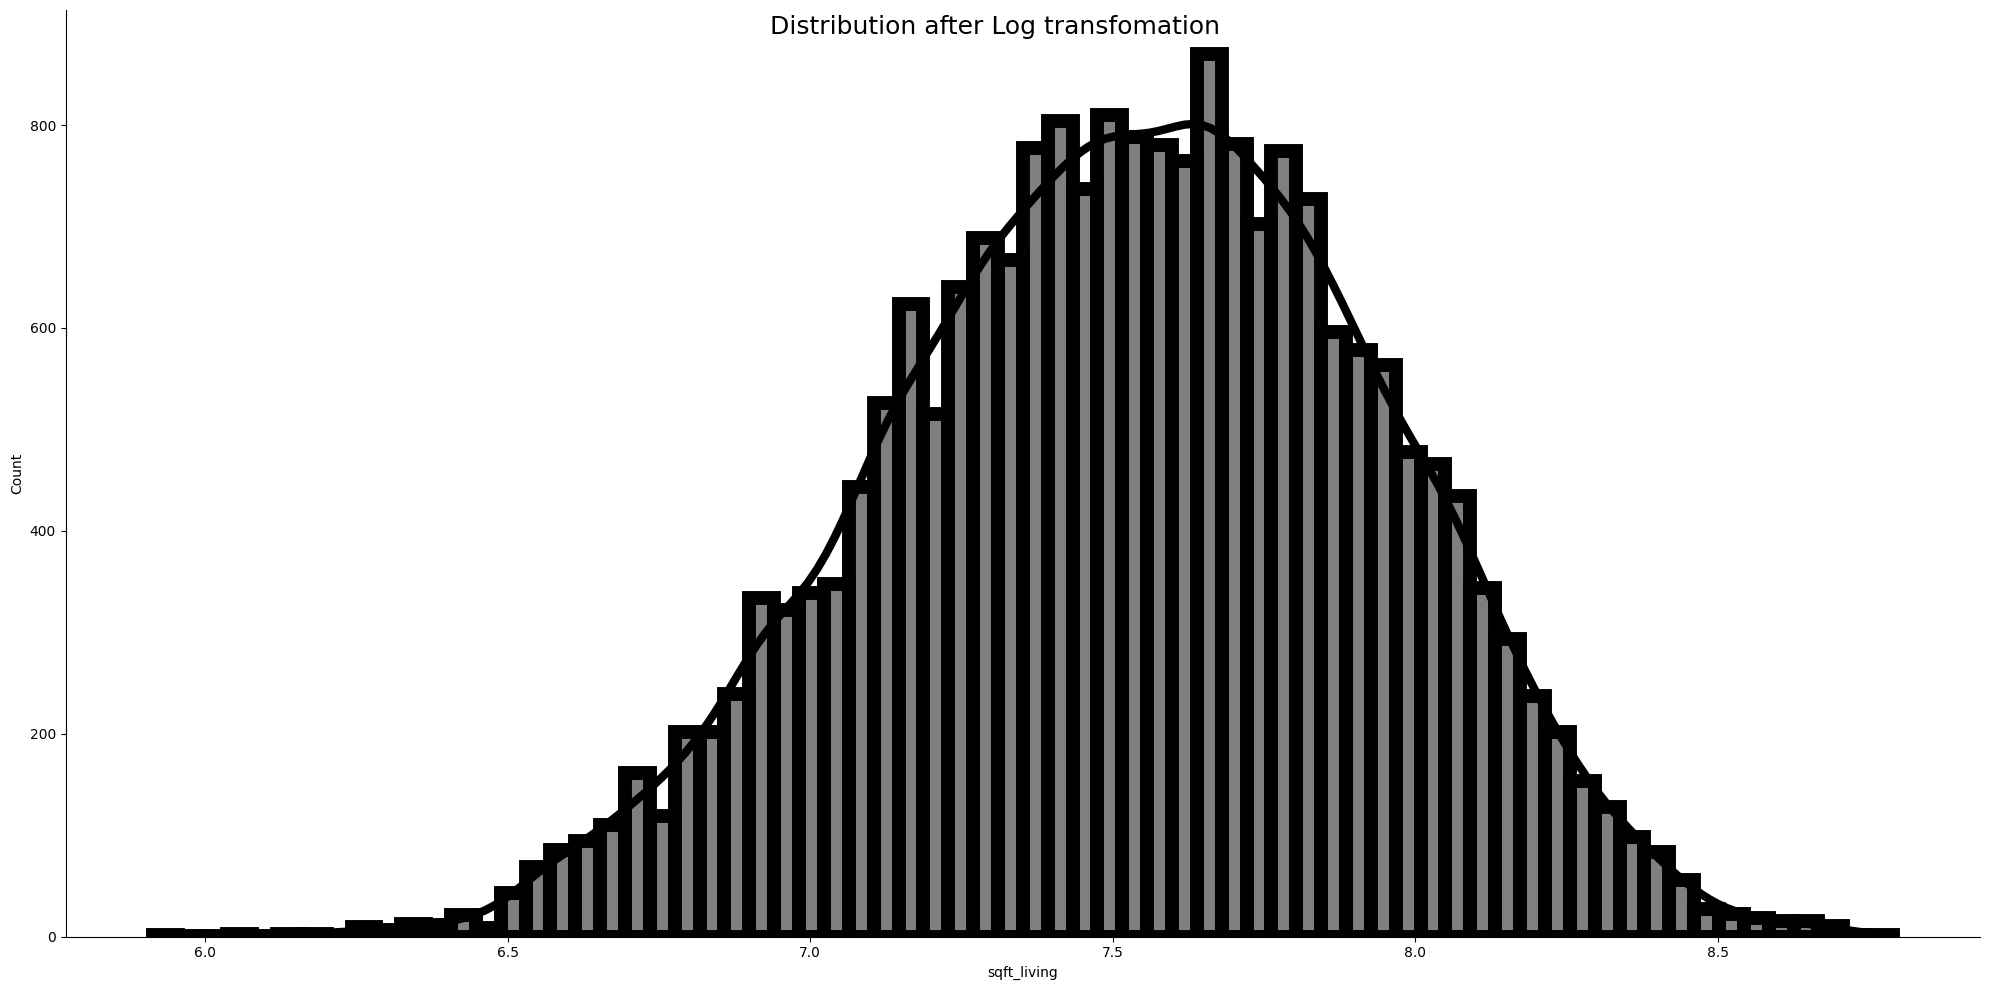

In [ ]:
liv = np.log(kc_data['sqft_living'])

ax = sns.displot(liv, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2,
            linewidth = 10 )

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [ ]:
max_living = kc_data['sqft_living'].max()

min_living = kc_data['sqft_living'].min()

avg_living = kc_data['sqft_living'].mean()

max_living, min_living, avg_living

(6563, 370, 2021.6008575512149)

In [ ]:
price_per_sqft_living = kc_data['price'].mean()/kc_data['sqft_living'].mean()

price_per_sqft_living

249.9106265861031

Text(0.5, 0.98, 'Distribution before Log transfomation')

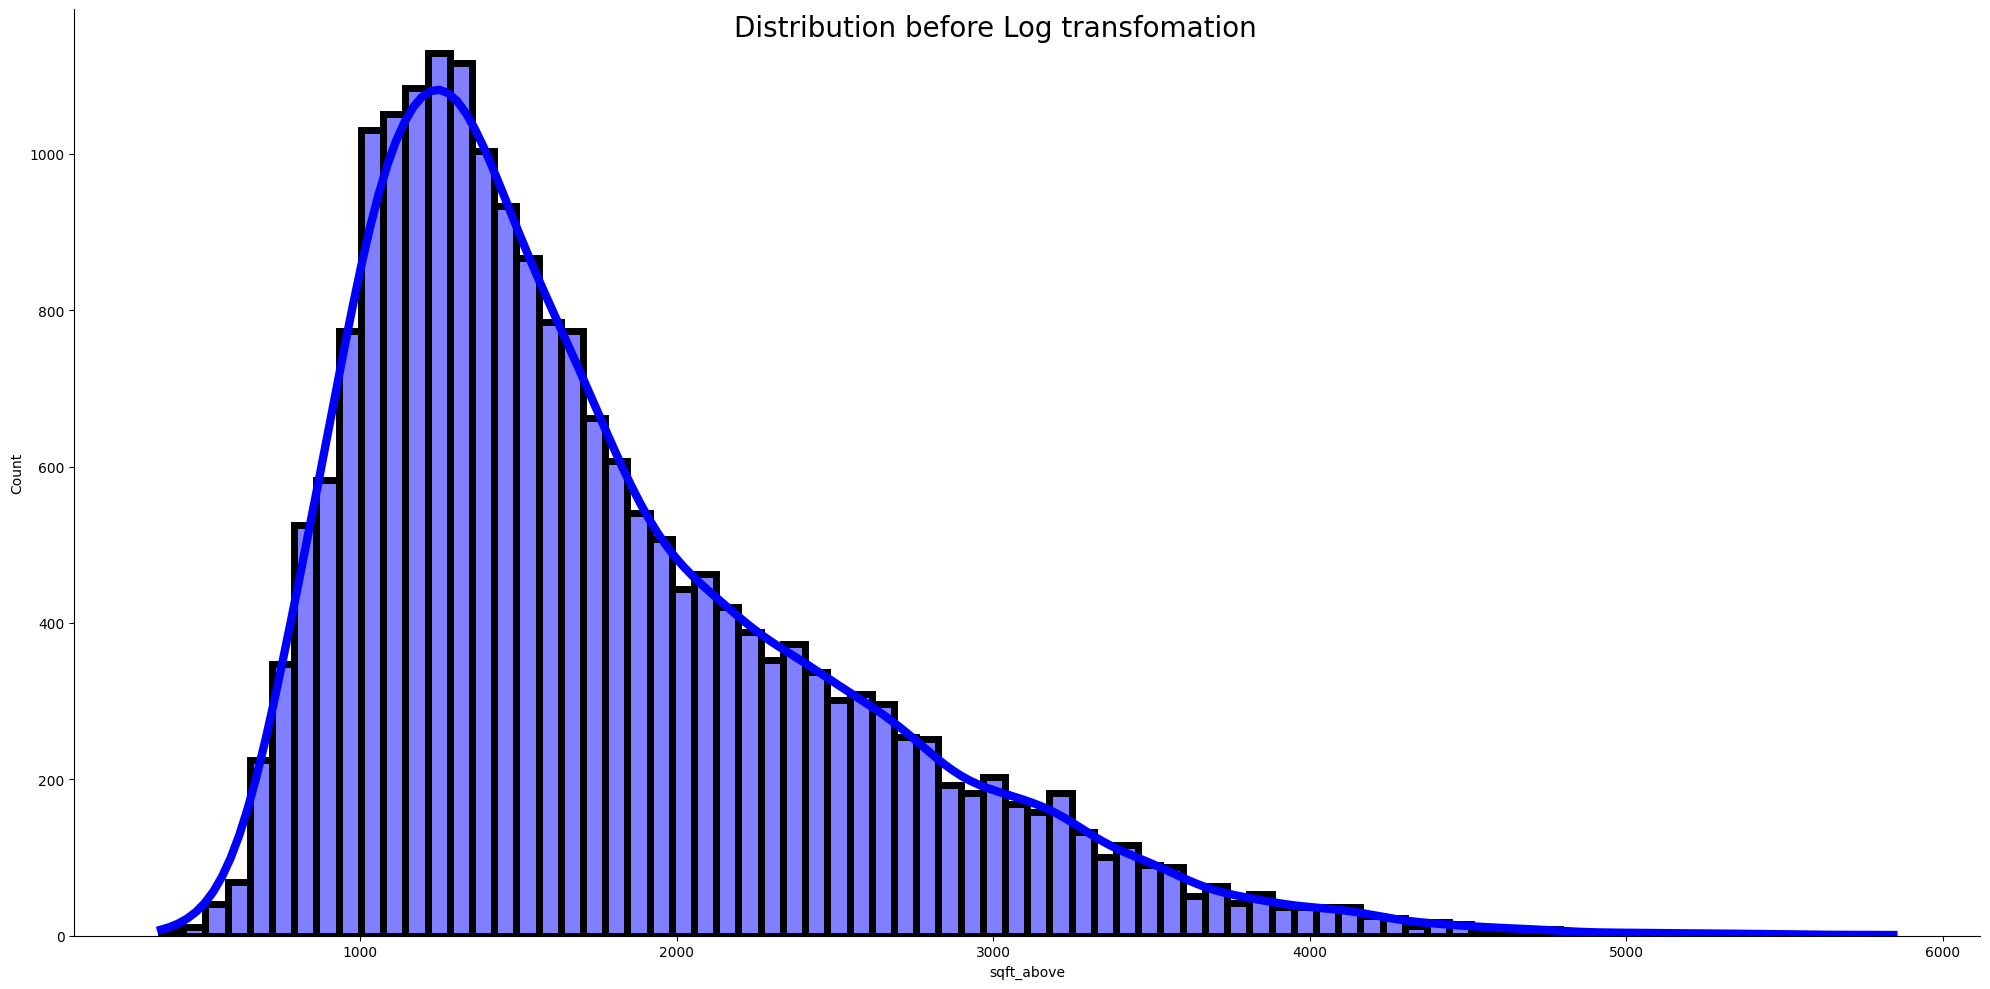

In [ ]:
ax = sns.displot(kc_data['sqft_above'], kde = True, line_kws={'color': 'blue', 'lw': 6} , color = "blue", height=10, aspect=2,
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

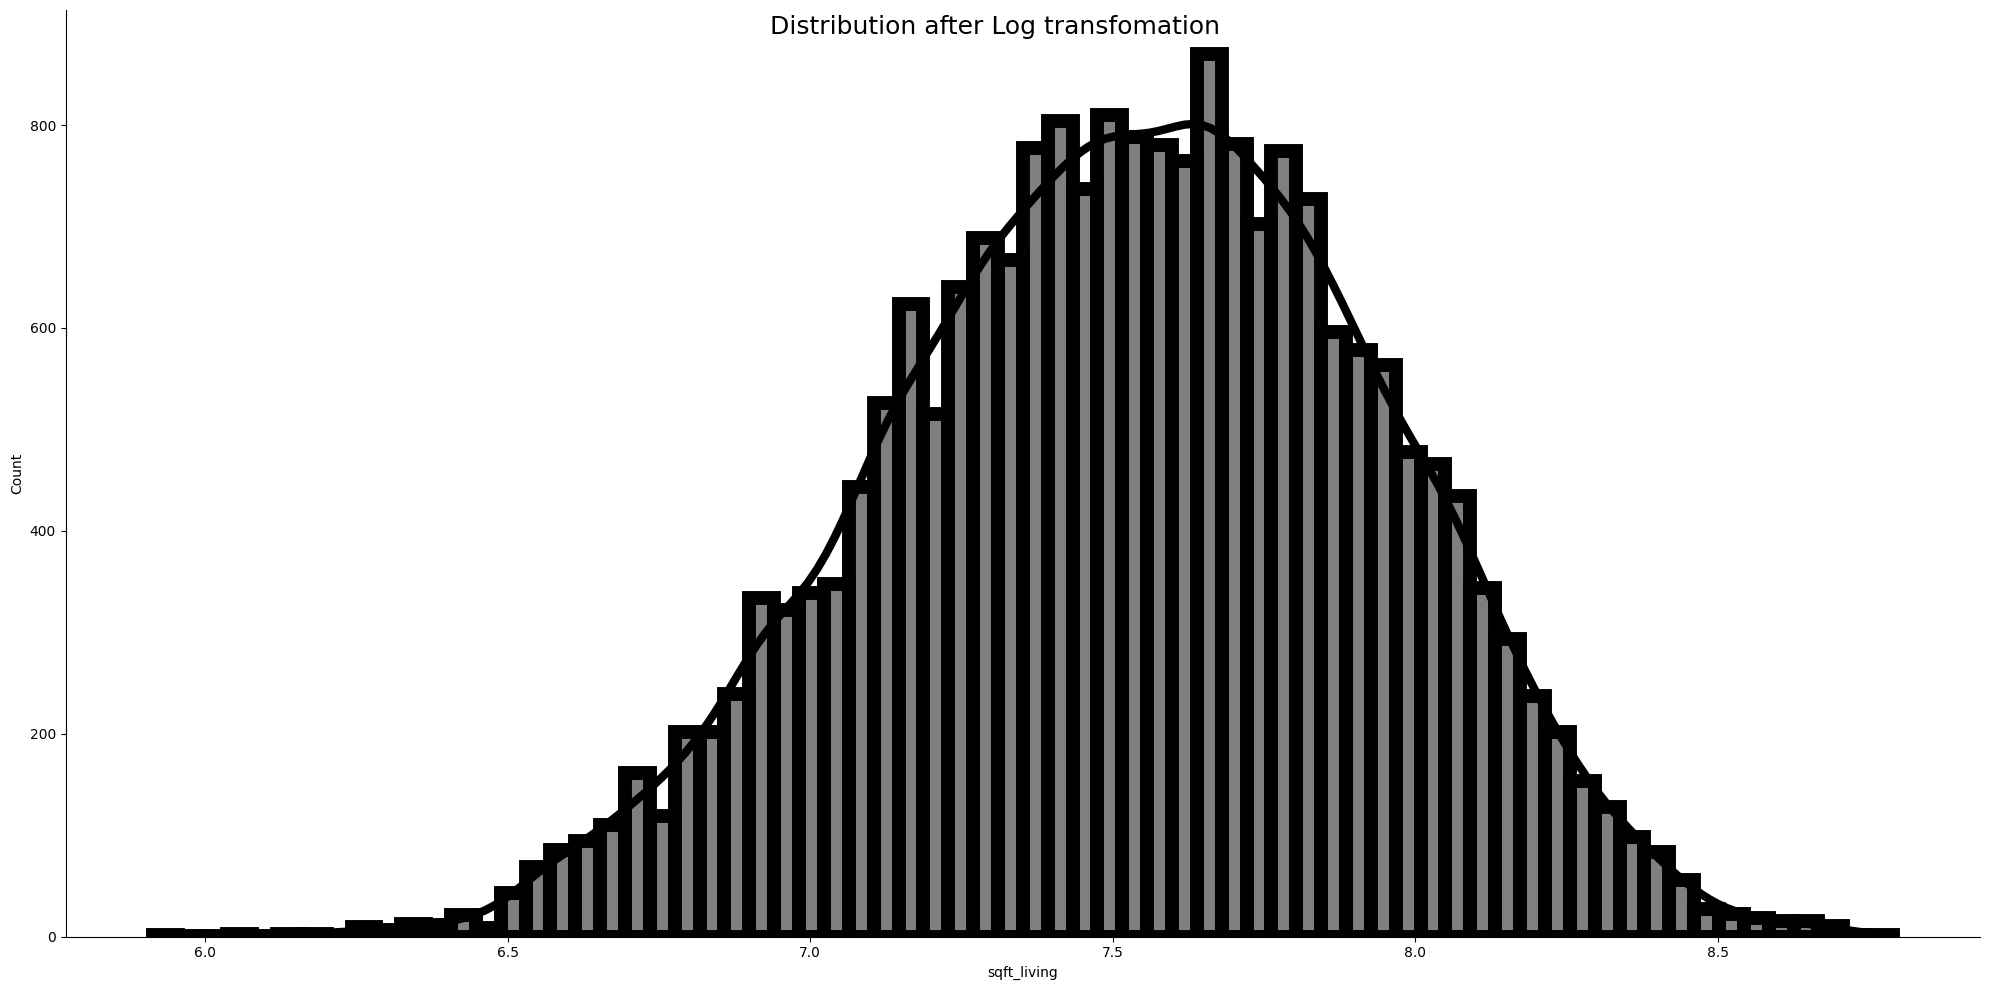

In [ ]:
ab= np.log(kc_data['sqft_above'])

ax = sns.displot(liv, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2,
            linewidth = 10 )

ax.fig.suptitle('Distribution after Log transfomation', size = 18)



*   Now we have normalized all the data that we will use for our analysis. We will start with comparing different columns to get a picture of how they affect each other.



In [ ]:
# maximum, minimum, average sqft_above

max_above = kc_data['sqft_above'].max()

min_above = kc_data['sqft_above'].min()

avg_above = kc_data['sqft_above'].mean()

max_above, min_above, avg_above

(5844, 370, 1742.4222486898523)

In [ ]:
# price per sqft_above
price_per_sqft_above = kc_data['price'].mean()/kc_data['sqft_above'].mean()

price_per_sqft_above

289.95241388676476

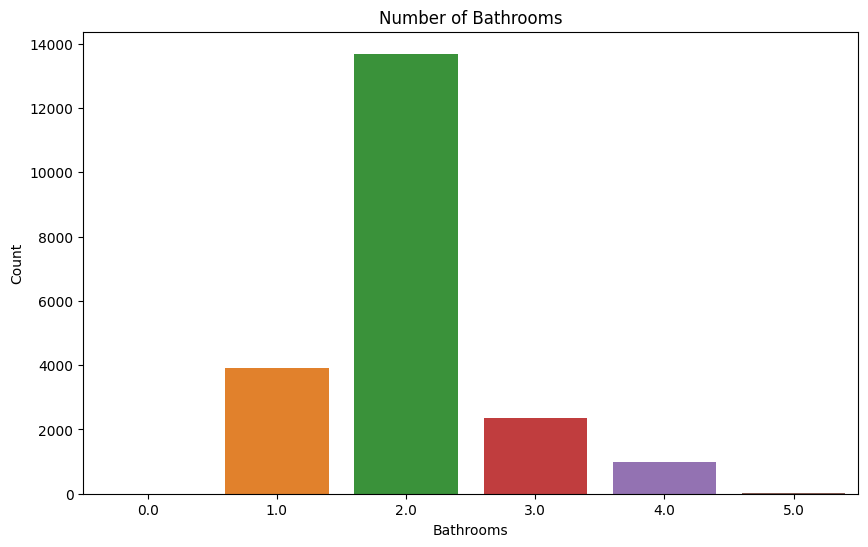

In [ ]:
# Bathroom count plot

plt.figure(figsize=(10,6))

sns.countplot(x='bathrooms', data= kc_data)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [ ]:
bathroom_count = (kc_data['bathrooms']).value_counts()

bathroom_count

2.0    13691
1.0     3915
3.0     2367
4.0      992
5.0       21
0.0        4
Name: bathrooms, dtype: int64

<Axes: xlabel='bathrooms', ylabel='price'>

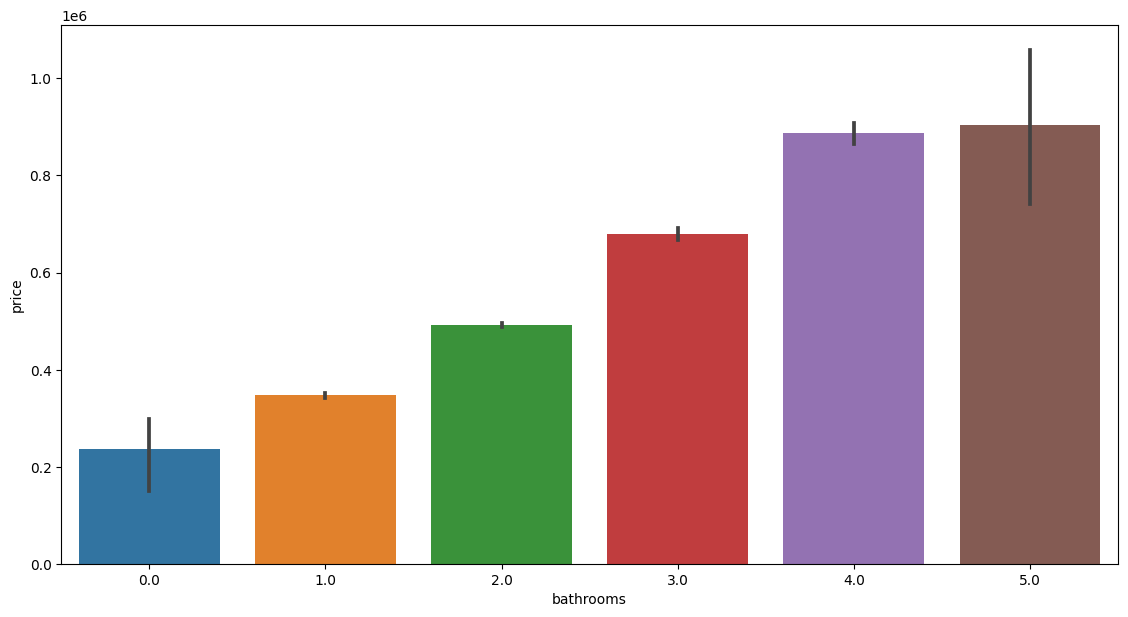

In [ ]:
# Bathroom vs Price

plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bathrooms', y='price', data=kc_data)

In [ ]:
bathroom_price = kc_data.groupby('bathrooms')['price'].mean().sort_values()

bathroom_price

bathrooms
0.0    237375.000000
1.0    346725.667944
2.0    492244.505953
3.0    679317.046895
4.0    887041.956653
5.0    903285.238095
Name: price, dtype: float64

From this analysis we can see that most houses in King County had 2 bathrooms.

The houses with more bathrooms had the highest prices.

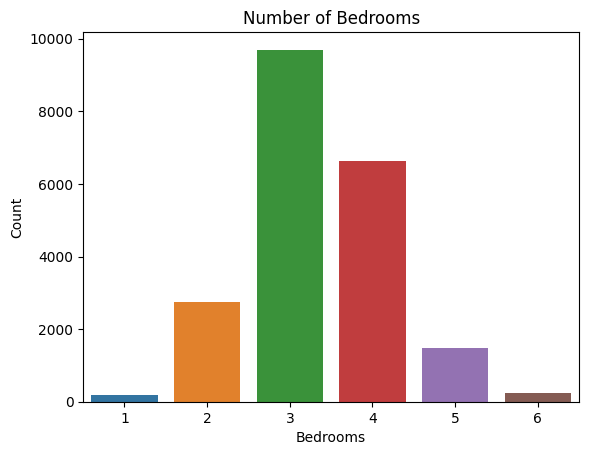

In [ ]:
# Bedrooms
sns.countplot(x='bedrooms',data=kc_data)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Bedrooms vs Price')

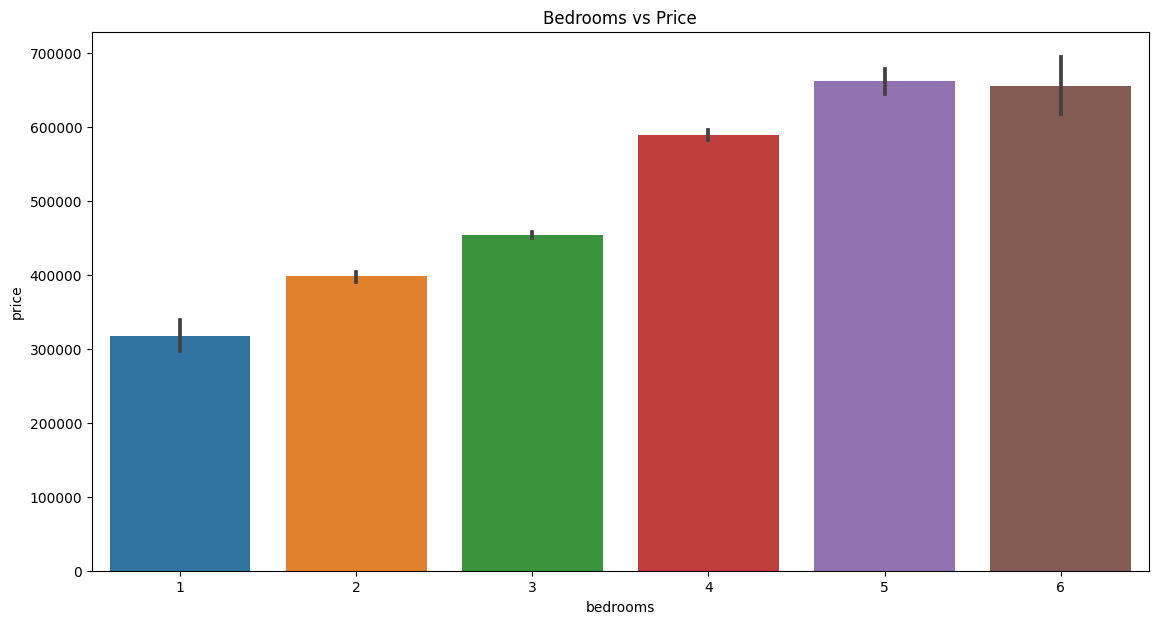

In [ ]:
# Bedroom count vs price

plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bedrooms', y='price', data=kc_data)
plt.title('Bedrooms vs Price')

In [ ]:

bedroom_price = kc_data.groupby('bedrooms')['price'].mean().sort_values()

bedroom_price

bedrooms
1    317948.379487
2    398085.762514
3    453869.124278
4    589549.414032
6    654960.133603
5    661724.389681
Name: price, dtype: float64

From this analysis we can see that most houses in King County had 3 bedrooms.

The houses with 5 bedrooms had the highest prices

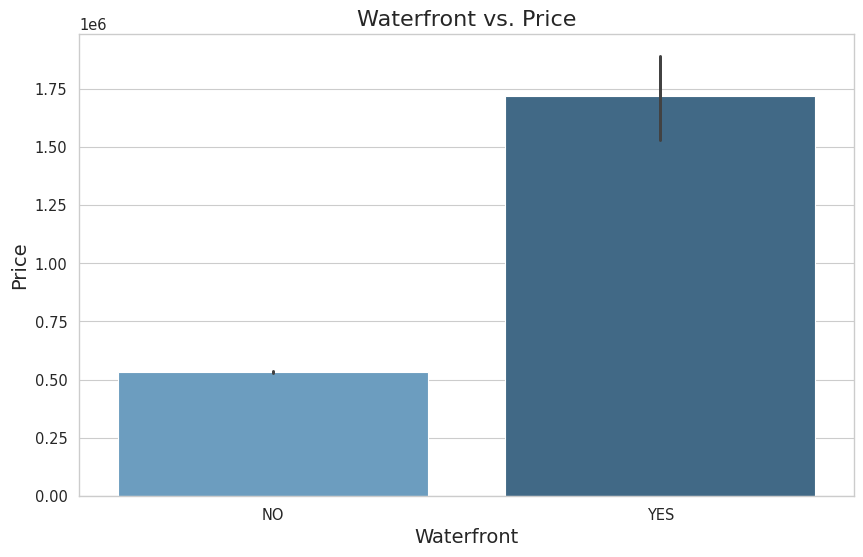

In [ ]:
#Waterfront vs Price
# Set the plot style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Plot the bar plot
sns.barplot(x=df['waterfront'], y=df['price'], palette="Blues_d")

# Set the plot title and axis labels
plt.title('Waterfront vs. Price', fontsize=16)
plt.xlabel('Waterfront', fontsize=14)
plt.ylabel('Price', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Display the plot
plt.show()

* from this we can see that houses with waterfronts are expensive by a wide range

<Axes: xlabel='condition', ylabel='count'>

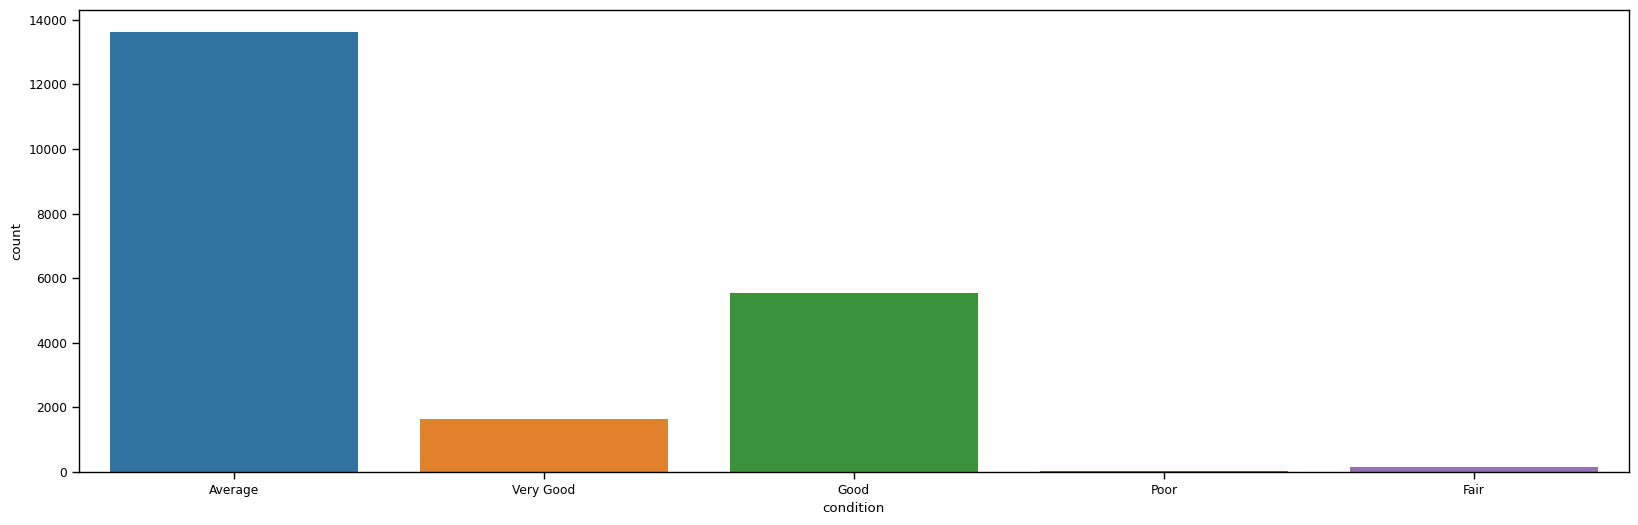

In [ ]:
# Condition

plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='condition',data=kc_data)

Text(0.5, 1.0, 'Condition vs Price')

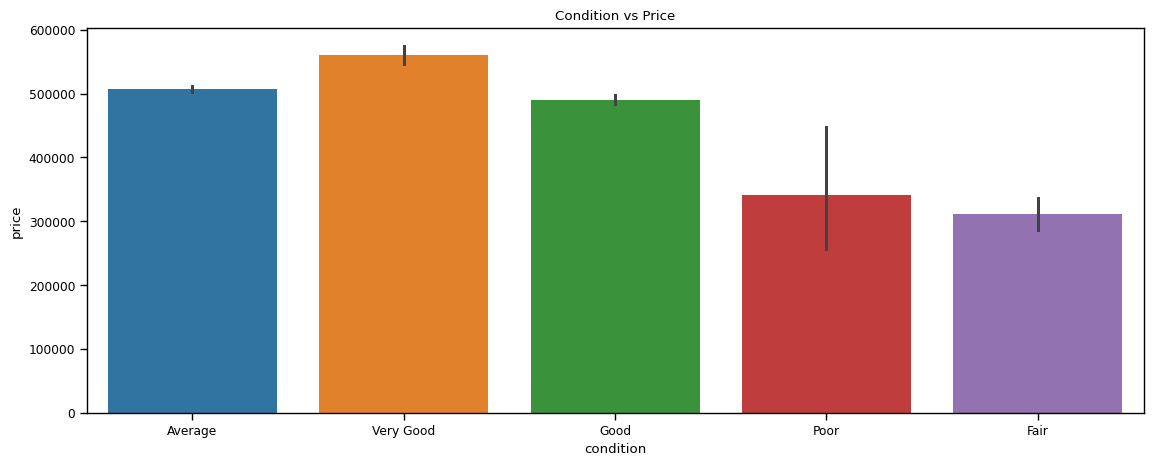

In [ ]:
# Condition count vs price

plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.barplot(x='condition', y='price', data=kc_data)
plt.title('Condition vs Price')

In [ ]:
kc_data['condition'].value_counts()

Average      13622
Good          5539
Very Good     1635
Fair           165
Poor            29
Name: condition, dtype: int64

In [ ]:
condition_price = kc_data.groupby('condition')['price'].mean().sort_values()

condition_price.round()

condition
Fair         312114.0
Poor         341067.0
Good         490213.0
Average      507394.0
Very Good    560339.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County were in an average condition.

The houses with a very good condition had the highest prices.

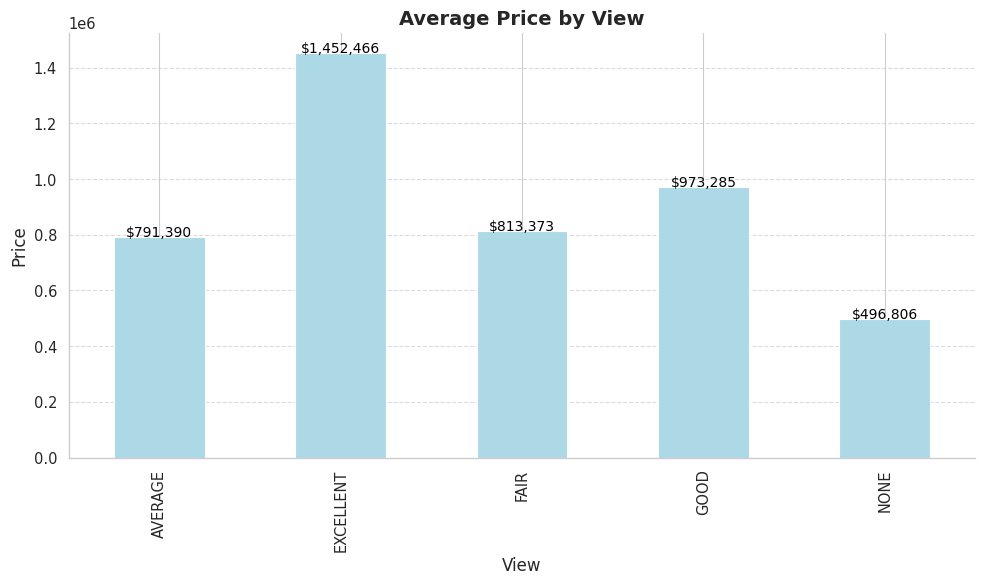

In [ ]:
#Average Price By View
# Set the style
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))


# Group the price by view and plot a bar graph
ax = df.groupby('view')['price'].mean().plot(kind='bar', color='lightblue')

# Set the plot title and axis labels
ax.set_title('Average Price by View', fontsize=14, fontweight='bold')
ax.set_xlabel('View', fontsize=12)
ax.set_ylabel('Price', fontsize=12)

# Add grid lines and remove top and right spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}",
                xy=(p.get_x() + p.get_width()/2, p.get_height() + 1000),
                ha='center',
                fontsize=10,
                color='black')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

* the price increases as the view increases, however it seems houses with a fair view ```2``` are priced higher than houses with a good view ```3```, despite fair being higher on our scale right after excellent

In [ ]:
# getting the value counts of unique items in the grade column

df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [ ]:
# separating the string to form integer of grade values
df.grade = df.grade.apply(lambda x: int(x.split(" ").pop(0)))

In [ ]:
# changing the data type to category

df['grade'] = df['grade'].astype("category")

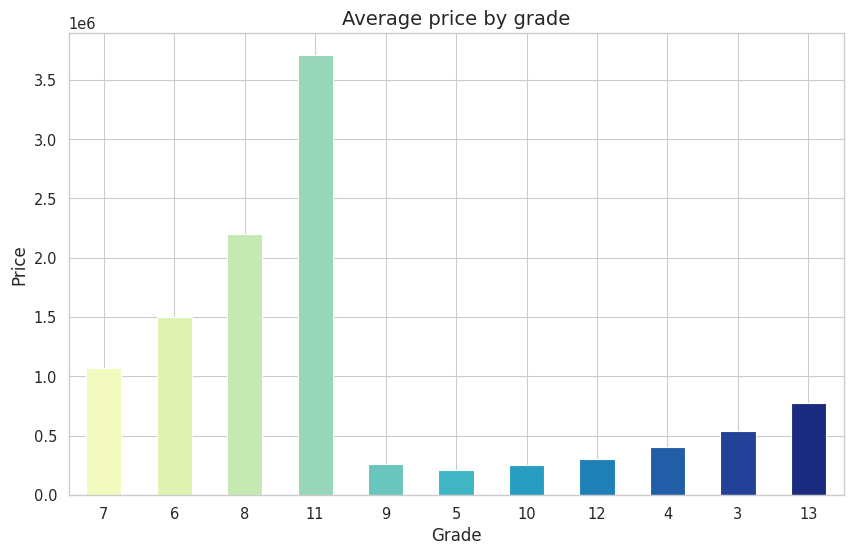

In [ ]:
#Average price by grade
# Import seaborn and set style
import seaborn as sns
sns.set_style('whitegrid')

# Create a color palette
colors = sns.color_palette('YlGnBu', len(df['grade'].unique()))

# Plot the bar chart with the chosen colors
ax = df.groupby('grade')['price'].mean().plot(kind='bar', color=colors)

# Set the plot title and axis labels
ax.set_title('Average price by grade', fontsize=14)
ax.set_xlabel('Grade', fontsize=12)
ax.set_ylabel('Price', fontsize=12)

# Set the x-tick labels to be more readable
ax.set_xticklabels(df['grade'].unique(), rotation=0)

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Show the plot
plt.show()


* we can observe that as the grade increases so does the average price of each grouped category, and rise of price from ```3``` to ```9``` is gradual then rises sharply ```9``` to ```13```

* from this we can see that as the grade of the house increases so does the sales price

<Axes: xlabel='yr_built', ylabel='count'>

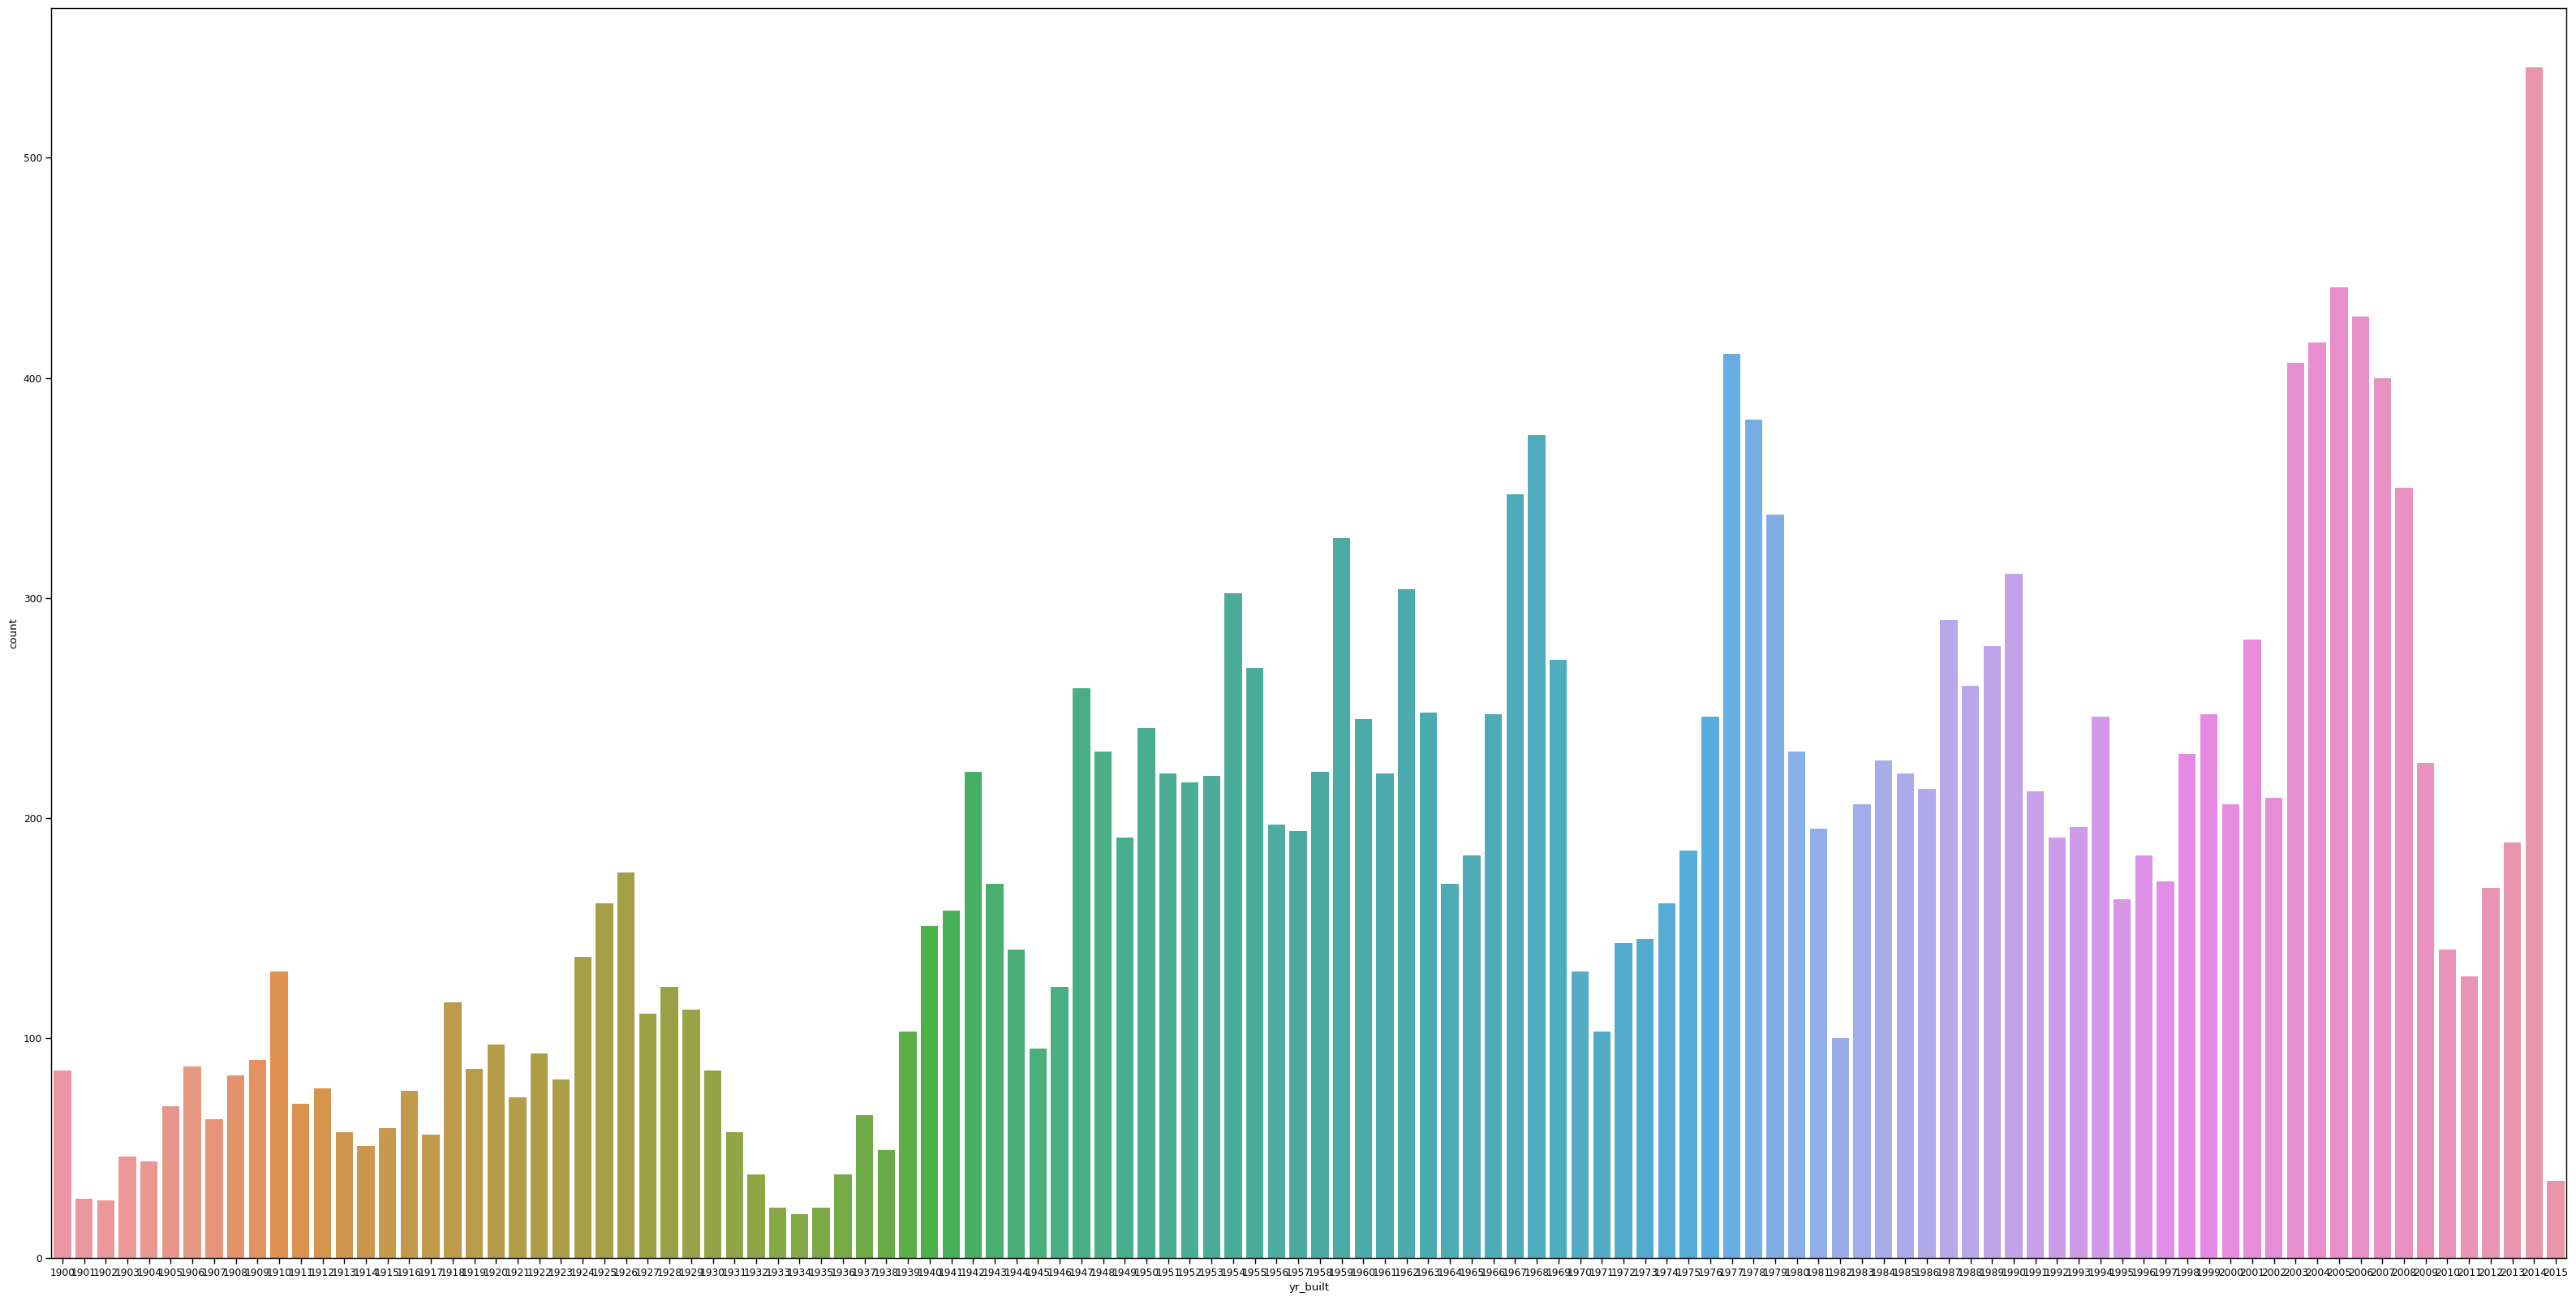

In [ ]:
# Year Built

plt.figure(figsize=(40,20))
sns.set_context("paper", font_scale=1)
sns.countplot(x='yr_built',data=kc_data)

Text(0.5, 1.0, 'Yr_Built vs Price')

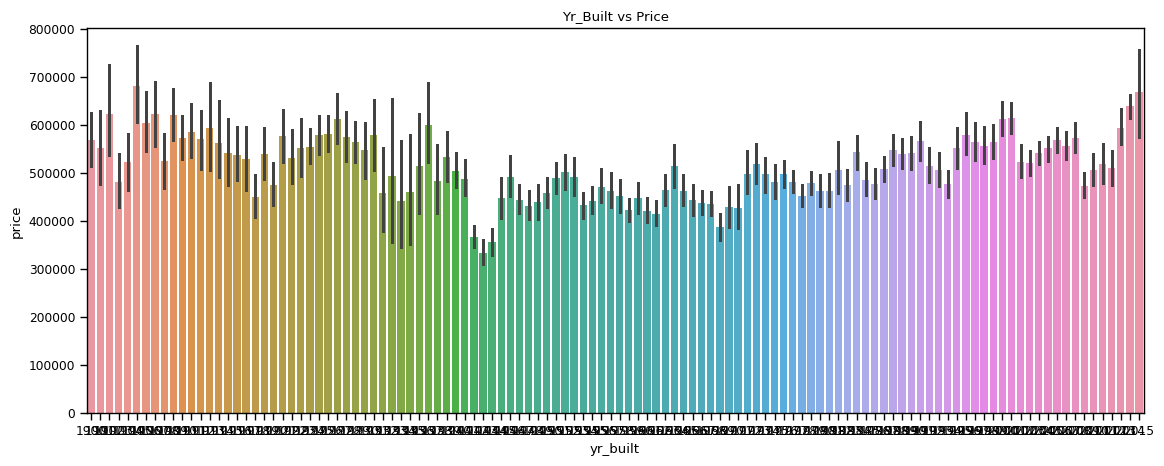

In [ ]:
# Yr Built count vs price
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.barplot(x='yr_built', y='price', data=kc_data)
plt.title('Yr_Built vs Price')

In [ ]:
kc_data['yr_built'].value_counts().head(10)


2014    541
2005    441
2006    428
2004    416
1977    411
2003    407
2007    400
1978    381
1968    374
2008    350
Name: yr_built, dtype: int64

In [ ]:
yr_built_price = kc_data.groupby('yr_built')['price'].mean().sort_values(ascending = False)

yr_built_price.round().head(10)

yr_built
1905    681027.0
2015    667968.0
2014    638263.0
1902    622546.0
1907    622398.0
1909    620624.0
2001    613268.0
1927    611657.0
2000    611497.0
1906    603937.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County were built in the 2000s.

Both the old and new houses had the highest prices.

<Axes: xlabel='waterfront', ylabel='count'>

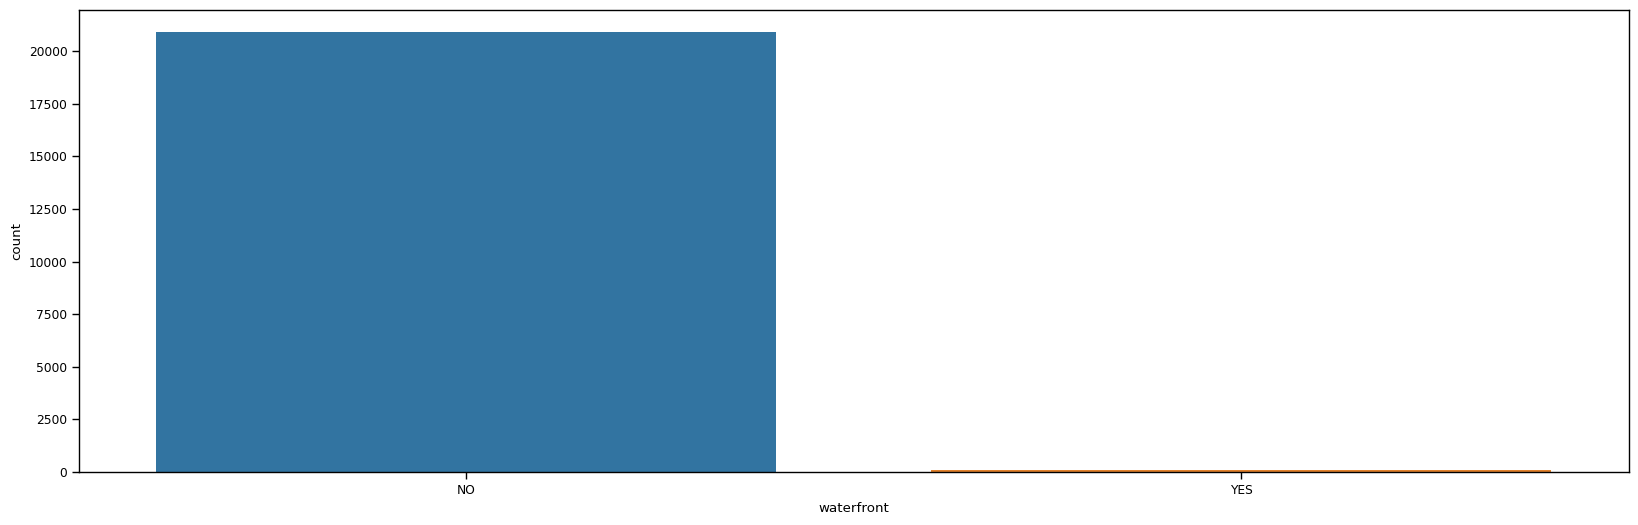

In [ ]:
# Waterfront

plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='waterfront',data=kc_data)

In [ ]:
kc_data['waterfront'].value_counts().head(10)

NO     20911
YES       79
Name: waterfront, dtype: int64

In [ ]:
waterfront_price = kc_data.groupby('waterfront')['price'].mean().sort_values(ascending = False)

waterfront_price.round().head(10)

waterfront
YES    923220.0
NO     503640.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County have no waterfront.

However, the houses with waterfront have the highest prices.

<Axes: xlabel='view', ylabel='count'>

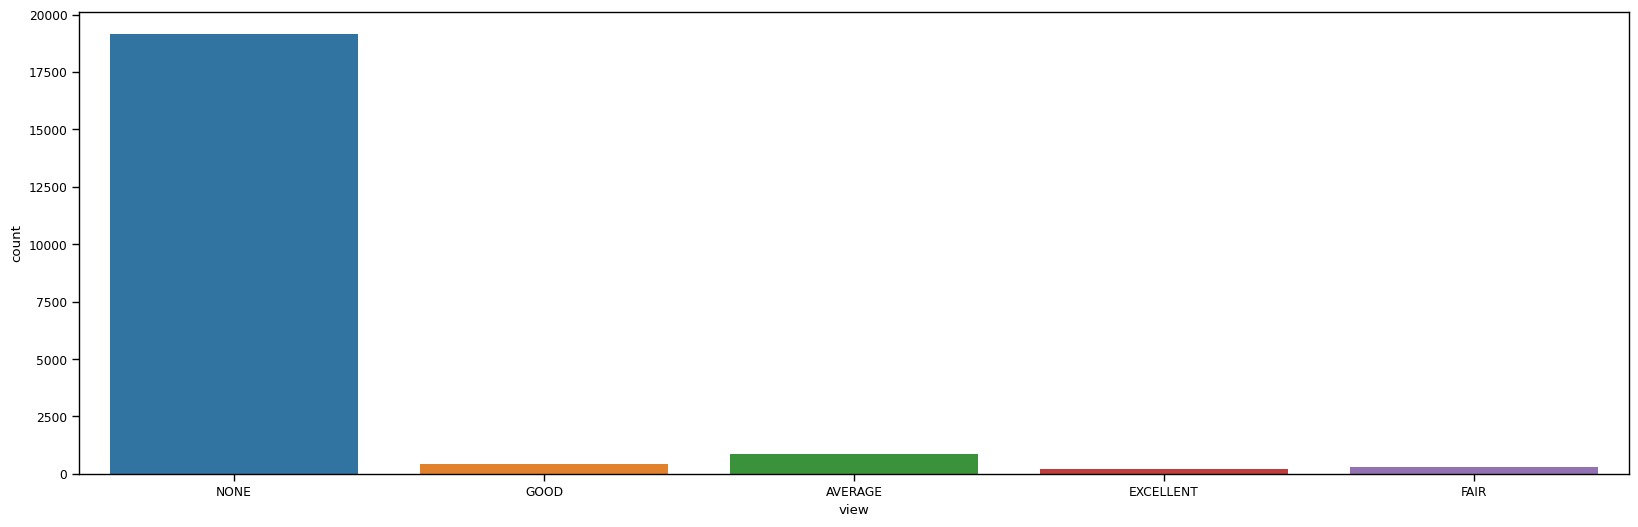

In [ ]:
# View

plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='view',data=kc_data)

In [ ]:
kc_data['view'].value_counts().head(10)

NONE         19157
AVERAGE        882
GOOD           434
FAIR           304
EXCELLENT      213
Name: view, dtype: int64

In [ ]:
view_price = kc_data.groupby('view')['price'].mean().sort_values(ascending = False)

view_price.round().head(10)

view
EXCELLENT    957691.0
GOOD         823257.0
AVERAGE      704297.0
FAIR         701839.0
NONE         480698.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County have no view.

However, the houses with an excellent view have the highest prices.

In [ ]:
# Year
kc_data['year'].value_counts()

2014    14218
2015     6772
Name: year, dtype: int64

In [ ]:
year_price = kc_data.groupby('year')['price'].mean()

year_price

year
2014    504812.516950
2015    506074.086828
Name: price, dtype: float64

Houses sold in 2015 had higher prices as compared to houses sold in 2014

# Data Modeling

In [ ]:
# Linearity of the Variables

waterfront = {"waterfront":     {"YES": 1, "NO": 0}}

kc_data = kc_data.replace(waterfront)
kc_data.head()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,condition,waterfront,yr_built,view,year,month
0,221900.0,5650,1180,1180,1.0,3,Average,0,1955,NONE,2014,10
1,538000.0,7242,2570,2170,2.0,3,Average,0,1951,NONE,2014,12
2,180000.0,10000,770,770,1.0,2,Average,0,1933,NONE,2015,2
3,604000.0,5000,1960,1050,3.0,4,Very Good,0,1965,NONE,2014,12
4,510000.0,8080,1680,1680,2.0,3,Average,0,1987,NONE,2015,2


In [ ]:
kc_data['view'].value_counts()

NONE         19157
AVERAGE        882
GOOD           434
FAIR           304
EXCELLENT      213
Name: view, dtype: int64

In [ ]:
kc_data["condition"] = kc_data["condition"].astype('category')

kc_data["condition_num"] = kc_data["condition"].cat.codes

kc_data["view"] = kc_data["view"].astype('category')

kc_data["view_num"] = kc_data["view"].cat.codes

#drop view and condition columns
kc_data.drop(['condition','view'], axis= 1, inplace=True)

kc_data.head()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,waterfront,yr_built,year,month,condition_num,view_num
0,221900.0,5650,1180,1180,1.0,3,0,1955,2014,10,0,4
1,538000.0,7242,2570,2170,2.0,3,0,1951,2014,12,0,4
2,180000.0,10000,770,770,1.0,2,0,1933,2015,2,0,4
3,604000.0,5000,1960,1050,3.0,4,0,1965,2014,12,4,4
4,510000.0,8080,1680,1680,2.0,3,0,1987,2015,2,0,4


In [ ]:
kc_data.head()


,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,waterfront,yr_built,year,month,condition_num,view_num
0,221900.0,5650,1180,1180,1.0,3,0,1955,2014,10,0,4
1,538000.0,7242,2570,2170,2.0,3,0,1951,2014,12,0,4
2,180000.0,10000,770,770,1.0,2,0,1933,2015,2,0,4
3,604000.0,5000,1960,1050,3.0,4,0,1965,2014,12,4,4
4,510000.0,8080,1680,1680,2.0,3,0,1987,2015,2,0,4


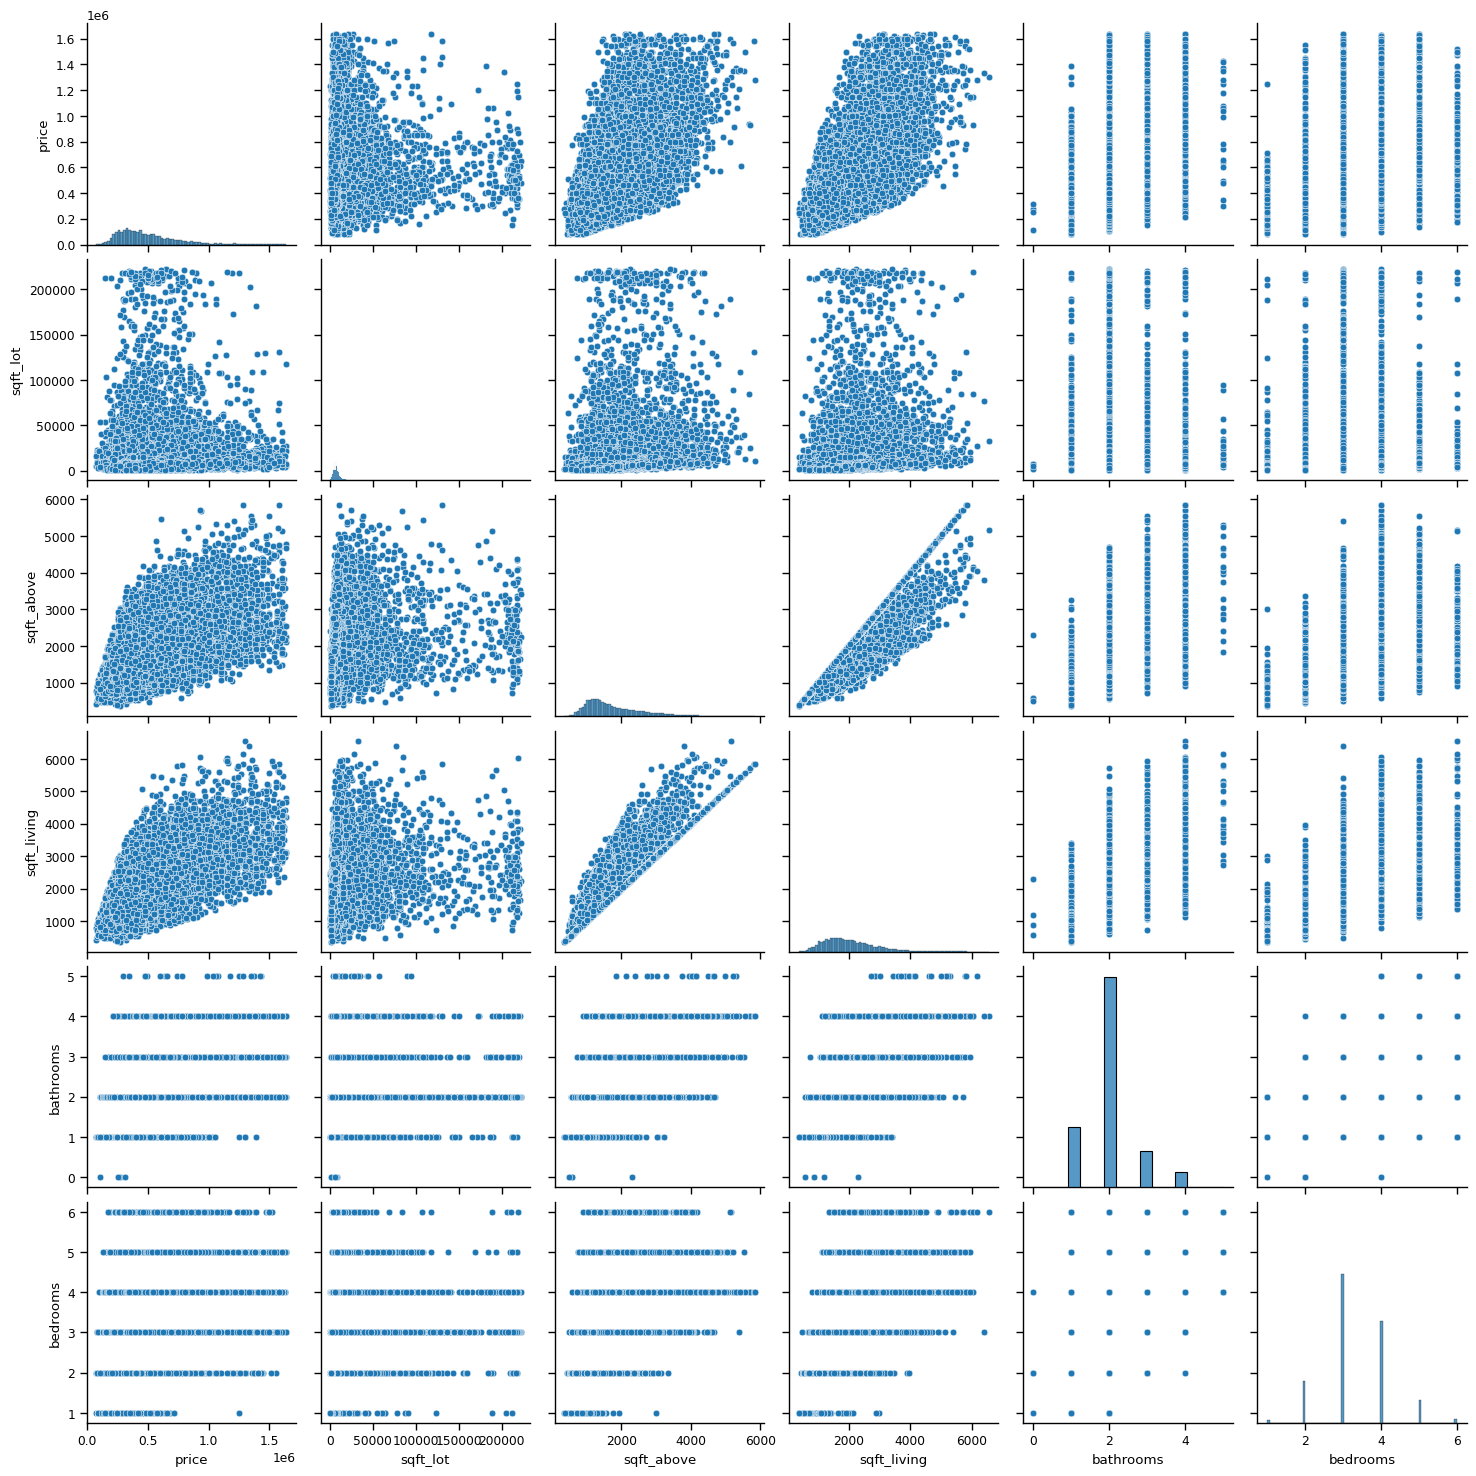

In [ ]:
# Scatter plot to show linearity

sns.set_context("paper", font_scale= 1)

continuous_data = kc_data.loc[:,["price", "sqft_lot", "sqft_above", "sqft_living", "bathrooms", "bedrooms"]]

n = sns.pairplot(continuous_data)

There is a positive linear relationship between the price and "sft_living" and "sqft_above".

There is no linear realtionship between price and "bathrooms" and "bedrooms"

**Correlation of the Variables**

We are going to use the Pearson correlation which measures the linear correlation between two continuous variables, and it relies on the two following assumptions:

There is a linear relationship between the two variables i.e. y = ax + b.

x and y both follow a normal distribution.



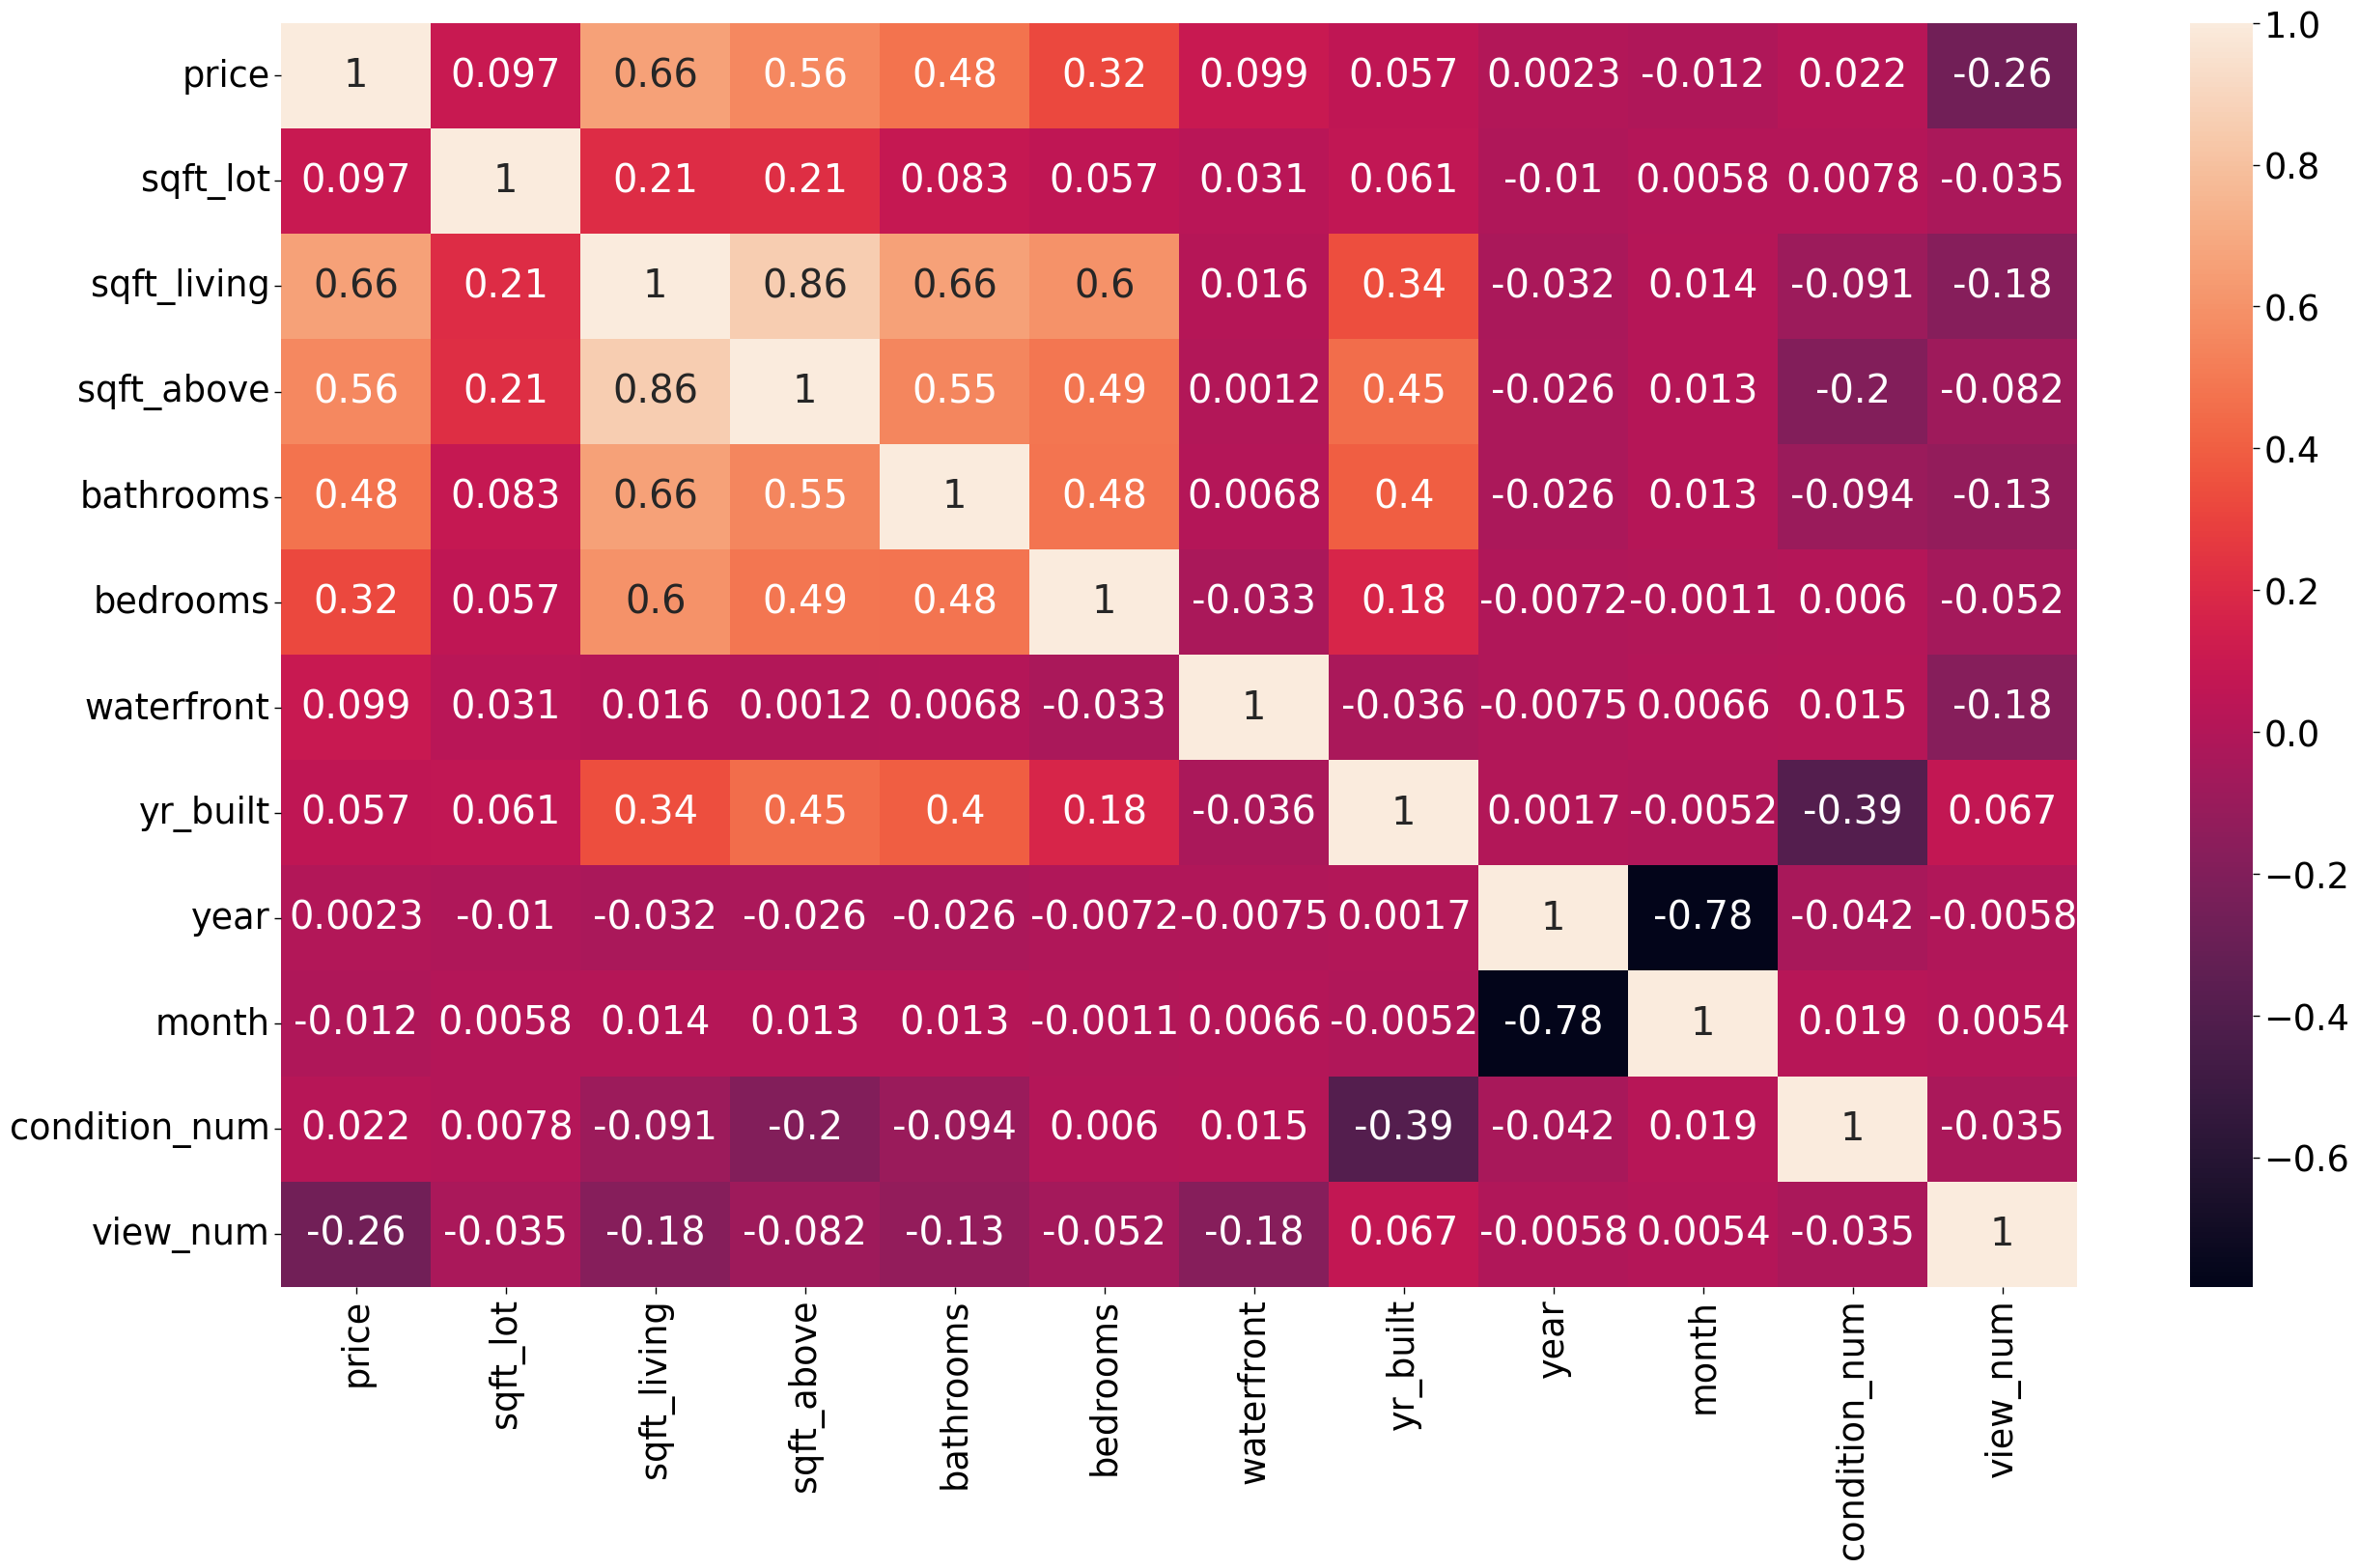

In [ ]:
# Heatmap to show correlation
plt.figure(figsize=(30,17))
sns.set_context("paper", font_scale= 3)
sns.heatmap(kc_data.corr(), annot = True )
plt.show()

## Regression Models

### Simple Linear Regression Model

#### Price vs Sqft_Living

In [ ]:
results_1 = smf.ols('price ~ sqft_living', data = kc_data).fit()

results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.636e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:11:10   Log-Likelihood:            -2.8531e+05
No. Observations:               20990   AIC:                         5.706e+05
Df Residuals:                   20988   BIC:                         5.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.442e+04   3551.106     23.774      0.000    7.75e+04    9.14e+04
sqft_living   208.1493      1.627    127.900      0.000     204.959     211.339
==============================================================================
Omnibus:                     3551.631   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7667.963
Skew:                           0.998   Prob(JB):                         0.00
Kurtosis:                       5.187   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import mean_squared_error

# Step 1 : split the data into train and test sets

train_data,test_data=train_test_split(kc_data,train_size=0.8,random_state=3)

# Step 2 : Train the model on the Training set
reg=LinearRegression()

x_train=np.array(train_data['sqft_living']).reshape(-1,1)

y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

# Step 3 : Predict the test results

x_test=np.array(test_data['sqft_living']).reshape(-1,1)

y_test=np.array(test_data['price']).reshape(-1,1)

pred=reg.predict(x_test)


print('linear model')

mean_squared_error = mean_squared_error(y_test,pred)

print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))

print('R squared training',round(reg.score(x_train,y_train),3))

print('R sqaured testing',round(reg.score(x_test,y_test),3) )

print('intercept',reg.intercept_)

print('coefficient',reg.coef_)

linear model
Sqaured mean error 196033.53
R squared training 0.44
R sqaured testing 0.429
intercept [85214.32146038]
coefficient [[207.50866829]]


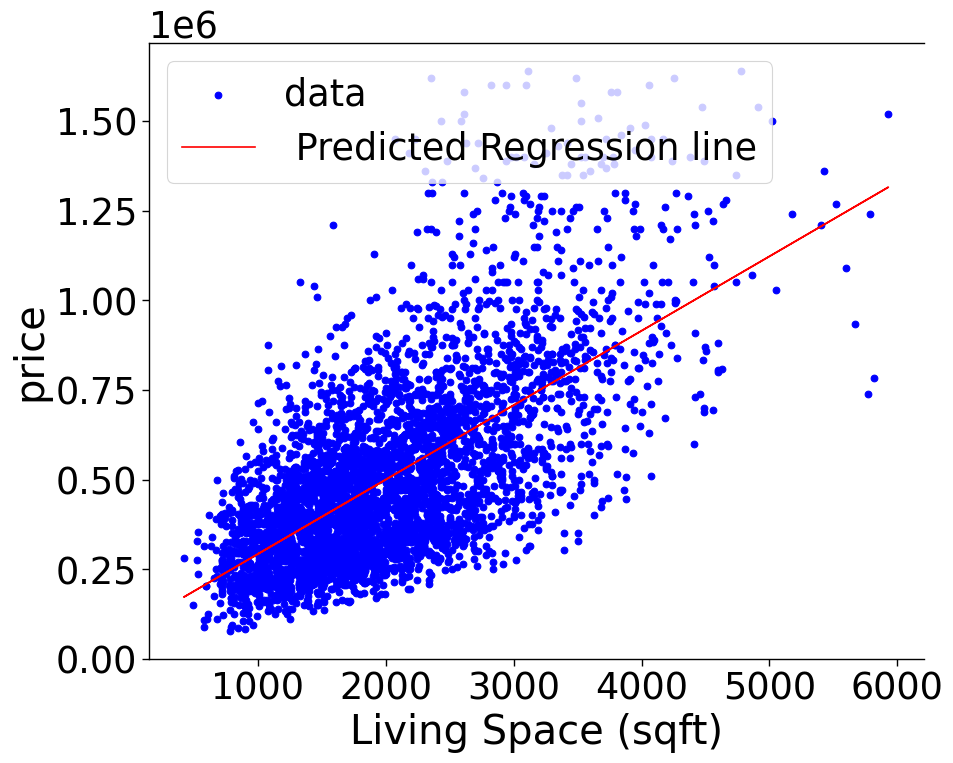

In [ ]:
_, ax = plt.subplots(figsize= (10, 8))

plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#### Price vs Sqft_Above

In [ ]:
results_2 = smf.ols('price ~ sqft_above', data = kc_data).fit()

results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9617.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:11:10   Log-Likelihood:            -2.8740e+05
No. Observations:               20990   AIC:                         5.748e+05
Df Residuals:                   20988   BIC:                         5.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.733e+05   3692.199     46.947      0.000    1.66e+05    1.81e+05
sqft_above   190.4711      1.942     98.068      0.000     186.664     194.278
==============================================================================
Omnibus:                     4455.498   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10229.580
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       5.427   Cond. No.                     4.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import mean_squared_error

# Step 1 : split the data into train and test sets
train_data,test_data=train_test_split(kc_data,train_size=0.8,random_state=3)


reg=LinearRegression()

# Step 2 : Train the model on the Training set
x_train=np.array(train_data['sqft_above']).reshape(-1,1)

y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

# Step 3 : Predict the test results
x_test=np.array(test_data['sqft_above']).reshape(-1,1)

y_test=np.array(test_data['price']).reshape(-1,1)

pred=reg.predict(x_test)

print('linear model')

mean_squared_error = mean_squared_error(y_test,pred)

print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))

print('R squared training',round(reg.score(x_train,y_train),3))

print('R sqaured testing',round(reg.score(x_test,y_test),3) )

print('intercept',reg.intercept_)

print('coefficient',reg.coef_)

linear model
Sqaured mean error 214828.58
R squared training 0.314
R sqaured testing 0.314
intercept [173162.85914915]
coefficient [[190.32328604]]


In [ ]:
_, ax = plt.subplots(figsize= (10, 8))

plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.xlabel('Above (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### Multiple Linear Regression Model

In [ ]:
m_1 = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront'

result3 = smf.ols(m_1, data = kc_data).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3587.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:11:11   Log-Likelihood:            -2.8487e+05
No. Observations:               20990   AIC:                         5.698e+05
Df Residuals:                   20984   BIC:                         5.698e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.415e+05   5498.255     25.739      

##  Regression Results

#### **Price and Sft_living**

R-squared: 0.438

p_value: 0

Interpretation: The r-squared value, 0.438, shows that the model can account for about 43.8% of the variability of price around its mean.

The null hypothesis for the simple linear regression is that there is no relationship between the chosen variable and the response variable.

All of the p-values round to 0, which means we can reject the null hypothesis.

#### **Price and (bedrooms + bathrooms + sqft_living + sqft_lot + waterfront)**

R-squared: 0.461

p_value: 0

Interpretation: The r-squared value, 0.461, shows that the model can account for about 46% of the variability of price around its mean.

The null hypothesis for multiple regression is that there is no relationship between the chosen variables and the response variable.

All of the p-values round to 0, which means we can reject the null hypothesis.

# Conclusion

**Univariate Anlysis**

* The price per sqft living and sqft above ranges from 200 dollars to 300 dollars.

* Most houses in King County had 2 bathrooms and 3 bedrooms. The houses with more bathrooms and bedrooms had the highest prices.

* In King County most were houses were in an average condition and the houses with a very good condition had the highest prices.

* Most of houses were built in the 2000s however, both the old and new houses had the highest prices.

* Most of the houses had no waterfront and no view however, the houses with a waterfront and a view had the highest prices.

* Lastly the houses sold in 2015 had higher prices as compared to houses sold in 2014.

**Regression Model**

The multiple linear regression model is better than the two simple regression models as it had a higher Rsquared value. This shows that categorical variables had a positive effect on the prices as illustrated in the univariate analysis.

Therefore adding these variables to the predictive model made the model to be a bit stronger.



##**Recommendations**

The real estate agency should review the sqft of the living space/ the ground above the basement when setting their house prices as there is a linear relationship between these variables.

Factors like bathrooms, bedrooms, having a waterfront and an excellent view have a positive effect on the house prices.

Lastly, the house prices seemed to have increased in 2015 they should therefore consider inflation when setting house prices in the future.